In [1]:
#pip install fredpy


In [2]:
import pandas as pd
import numpy as np
import fredpy as fp
import matplotlib.pyplot as plt

# Loading API key


In [3]:
fp.api_key = '6ce523c65ffb8915dddf970acab037d6'

The goal of this project is to predit the corporate bond spreads. This notebook provides the code to create the dataframe required to train and run AI/ML models to predict the corporate bond spreads. The inputs used for predicting corporate bond spreads are SP 500, vix, slope(T10y-T2y spreads), skew, GDP, fed fund rate, inflation rate


# Downloading the required input data

The breakeven inflation rate represents a measure of expected inflation derived from 10-Year Treasury Constant Maturity Securities (BC_10YEAR) and 10-Year Treasury Inflation-Indexed Constant Maturity Securities (TC_10YEAR). The latest value implies what market participants expect inflation to be in the next 10 years, on average.
Starting with the update on June 21, 2019, the Treasury bond data used in calculating interest rate spreads is obtained directly from the U.S. Treasury Department.

The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity. (1) The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.(2) The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The S&P CoreLogic Case-Shiller Home Price Indices are the leading measures of U.S. residential real estate prices, tracking changes in the value of residential real estate nationally.

The effective yield of the ICE BofA AAA US Corporate Index, a subset of the ICE BofA US Corporate Master Index tracking the performance of US dollar denominated investment grade rated corporate debt publicly issued in the US domestic market.

In [4]:
# Restrict observations from January 1, 2014 to 2023 with daily frequency
win = ['01-01-2014','01-01-2023']

sp500 = fp.series('SP500').window(win).as_frequency(freq='D')
vix = fp.series('VIXCLS').window(win).as_frequency(freq='D')
slope = fp.series('T10Y2Y').window(win).as_frequency(freq='D')
gdp = fp.series('GDP').window(win).as_frequency(freq='Q')
fedfund_rate = fp.series('DFF').window(win).as_frequency(freq='D')
breakeven_inflation_rate = fp.series('T10YIE').window(win).as_frequency(freq='D')
case_schiller_index = fp.series('CSUSHPINSA').window(win).as_frequency(freq='M')
cb_spreads = fp.series('BAMLC0A1CAAAEY').window(win).as_frequency(freq='D')
cpi = fp.series('CPIAUCSL').window(win).as_frequency(freq='M')

# Equalize the date ranges
[sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi] = fp.window_equalize([sp500, vix, slope, gdp, fedfund_rate, breakeven_inflation_rate, case_schiller_index, cb_spreads,cpi])

# plotting the data


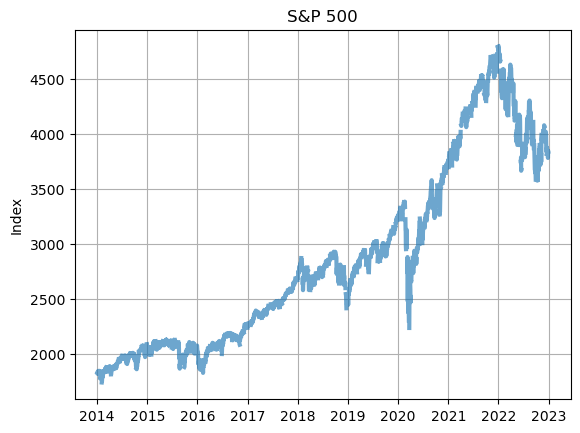

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sp500.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(sp500.title)
ax.set_ylabel(sp500.units);

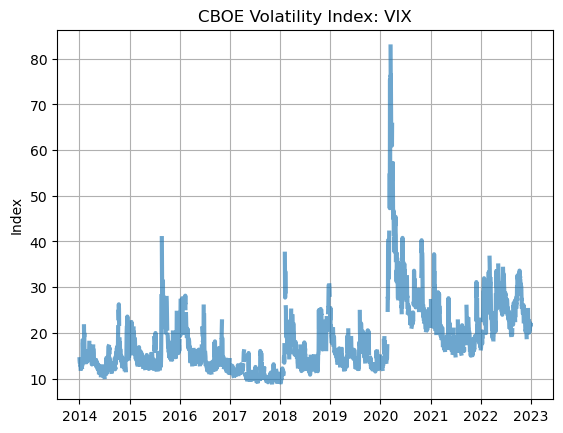

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vix.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(vix.title)
ax.set_ylabel(vix.units);

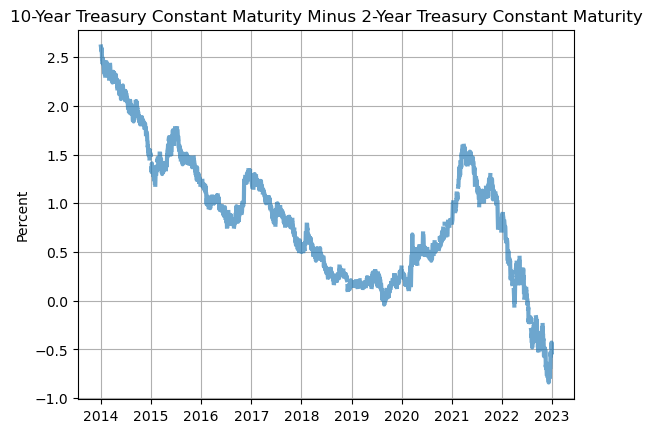

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(slope.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(slope.title)
ax.set_ylabel(slope.units);

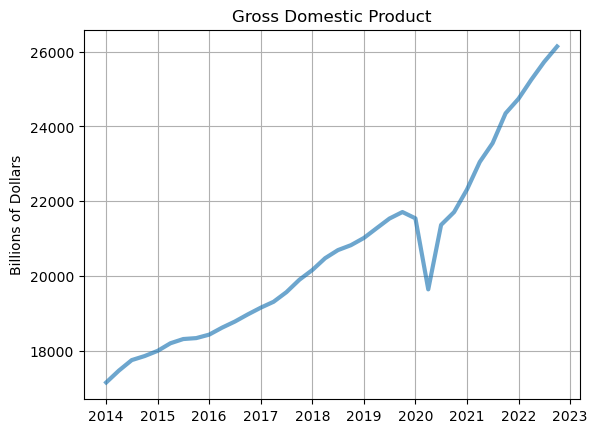

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(gdp.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(gdp.title)
ax.set_ylabel(gdp.units);

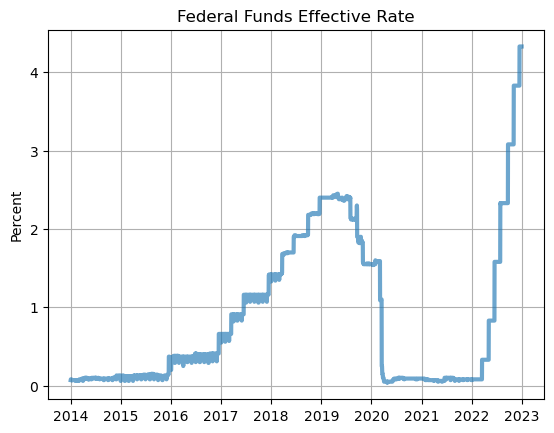

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(fedfund_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(fedfund_rate.title)
ax.set_ylabel(fedfund_rate.units);

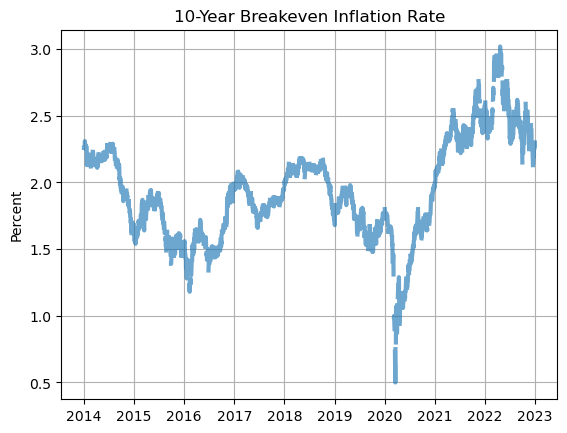

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(breakeven_inflation_rate.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(breakeven_inflation_rate.title)
ax.set_ylabel(breakeven_inflation_rate.units);

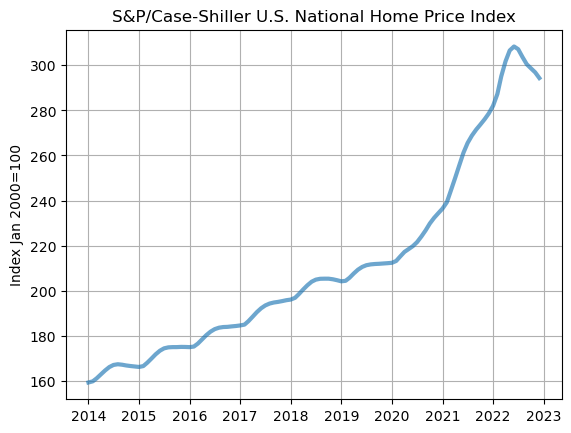

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(case_schiller_index.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(case_schiller_index.title)
ax.set_ylabel(case_schiller_index.units);

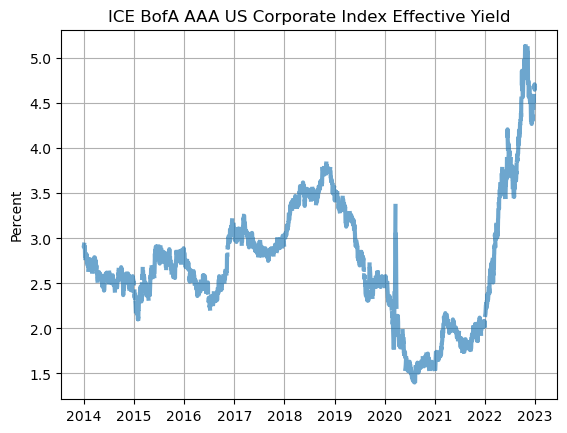

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cb_spreads.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cb_spreads.title)
ax.set_ylabel(cb_spreads.units);

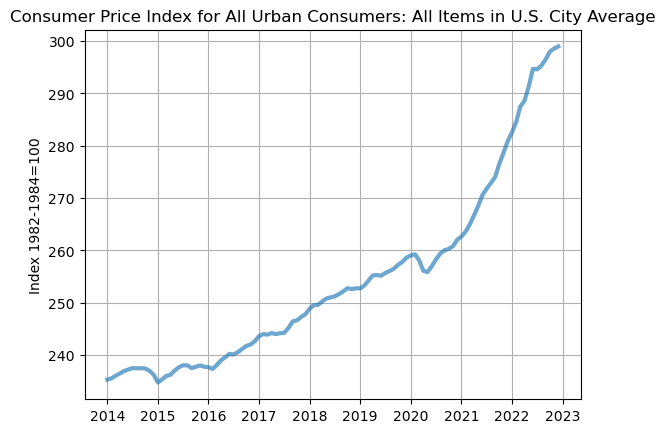

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(cpi.data,'-',lw=3,alpha = 0.65)
ax.grid()
ax.set_title(cpi.title)
ax.set_ylabel(cpi.units);

In [14]:
data = {'SP500': sp500.data,'Vix': vix.data, 'slope': slope.data,'GDP': gdp.data,'Fed fund rate': fedfund_rate.data, 'Breakeven inflation rate': breakeven_inflation_rate.data, 'House price index': case_schiller_index.data, 'US-AAA yield': cb_spreads.data,'CPI': cpi.data}


In [15]:
df = pd.DataFrame(data)
df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [16]:

df

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,NaN,NaN,NaN,17144.281,0.07,NaN,159.37,NaN,235.288
2014-01-02,1831.98,14.23,2.61,NaN,0.08,2.26,NaN,2.92,NaN
2014-01-03,1831.37,13.76,2.60,NaN,0.08,2.26,NaN,2.93,NaN
2014-01-04,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,4.33,NaN,NaN,NaN,NaN
2022-12-27,3829.25,21.65,-0.48,NaN,4.33,2.26,NaN,4.68,NaN
2022-12-28,3783.22,22.14,-0.43,NaN,4.33,2.28,NaN,4.71,NaN


In [17]:
# interpolated dataframe
df = pd.DataFrame(data)
df['SP500']= np.log(df['SP500'] / df['SP500'].shift())
df = df.interpolate(method='linear', axis=0).ffill().bfill()
df.head()

,SP500,Vix,slope,GDP,Fed fund rate,Breakeven inflation rate,House price index,US-AAA yield,CPI
date,,,,,,,,,
2014-01-01,-0.000333,14.23,2.610000,17144.281000,0.07,2.26,159.370000,2.92,235.288000
2014-01-02,-0.000333,14.23,2.610000,17147.819022,0.08,2.26,159.386226,2.92,235.296355
2014-01-03,-0.000333,13.76,2.600000,17151.357044,0.08,2.26,159.402452,2.93,235.304710
2014-01-04,0.001266,13.69,2.593333,17154.895067,0.08,2.26,159.418677,2.92,235.313065
2014-01-05,0.002865,13.62,2.586667,17158.433089,0.08,2.26,159.434903,2.91,235.321419


<Axes: xlabel='date'>

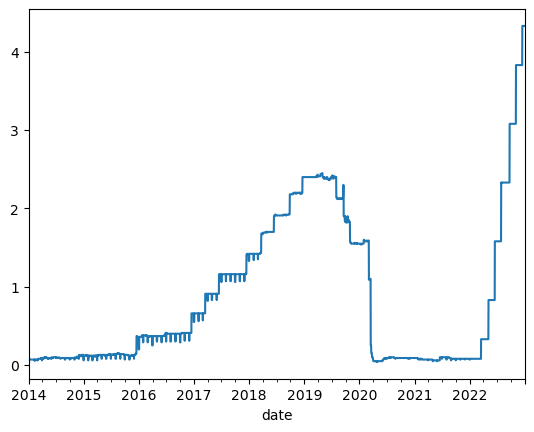

In [18]:
df["Fed fund rate"].plot()

<Axes: xlabel='date'>

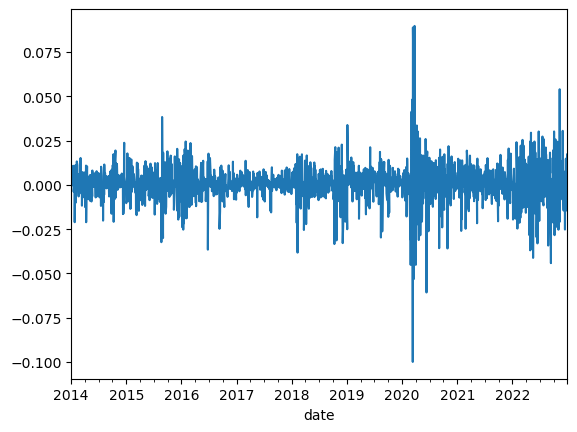

In [19]:
df["SP500"].plot()

# Linear regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df[['SP500','Vix','slope','GDP','Fed fund rate','Breakeven inflation rate','House price index','CPI']]
y = df['US-AAA yield']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [22]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 9.268948549160788
betas = [-5.92261566e-01  8.07740278e-03 -2.06935847e-01 -8.06589251e-04
  7.76652159e-01  1.04801290e+00  3.75416789e-02 -1.64736417e-03]


In [23]:
Y_predicted = model.predict(X)

In [24]:
df['US-AAA yield OLS predicted' ] = Y_predicted

<Axes: xlabel='date'>

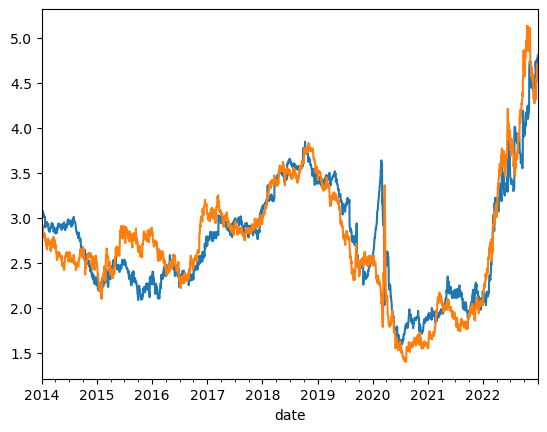

In [25]:
df["US-AAA yield OLS predicted"].plot()
df["US-AAA yield"].plot()


# Ai models

In [26]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, Nadam
import xgboost as xgb

2023-08-09 16:50:23.703536: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
df_univariate = df["US-AAA yield"]

In [28]:
train, validate, test = np.split(df_univariate.sample(frac=1, random_state=None), [int(.8*len(df)), int(.9*len(df))])

In [29]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)

In [30]:
n_steps = 30

# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)


In [31]:
print(X_train)
print(Y_train)

[[1.9        2.31       2.69       ... 2.27       2.99       2.47      ]
 [2.31       2.69       2.51333333 ... 2.99       2.47       2.25      ]
 [2.69       2.51333333 2.56       ... 2.47       2.25       4.32      ]
 ...
 [3.52       4.78       2.57       ... 2.52333333 2.6        2.55      ]
 [4.78       2.57       2.82       ... 2.6        2.55       3.47      ]
 [2.57       2.82       2.3        ... 2.55       3.47       2.7       ]]
[2.25 4.32 3.04 ... 3.47 2.7  1.7 ]


In [32]:
n_features = 1

# define model
model = Sequential()
model.add(InputLayer((n_steps, n_features)))
model.add(GRU(64))
model.add(Dense(n_steps,'relu'))
model.add(Dense(1,'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 30)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 14,845
Trainable params: 14,845
Non-trainable params: 0
_________________________________________________________________


2023-08-09 16:50:26.180396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [33]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300,  verbose=1, shuffle=False)

Epoch 1/300
82/82 [==============================] - 2s 11ms/step - loss: 3.5170 - root_mean_squared_error: 1.8754 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6709
Epoch 2/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4916 - root_mean_squared_error: 0.7012 - val_loss: 0.4363 - val_root_mean_squared_error: 0.6606
Epoch 3/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4888 - root_mean_squared_error: 0.6992 - val_loss: 0.4357 - val_root_mean_squared_error: 0.6601
Epoch 4/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4875 - root_mean_squared_error: 0.6982 - val_loss: 0.4356 - val_root_mean_squared_error: 0.6600
Epoch 5/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4868 - root_mean_squared_error: 0.6977 - val_loss: 0.4355 - val_root_mean_squared_error: 0.6600
Epoch 6/300
82/82 [==============================] - 1s 8ms/step - loss: 0.4863 - root_mean_squared_error: 0.6974 - val_loss: 0.4355 - val_root_

Epoch 49/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4369 - val_root_mean_squared_error: 0.6610
Epoch 50/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4369 - val_root_mean_squared_error: 0.6610
Epoch 51/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4369 - val_root_mean_squared_error: 0.6610
Epoch 52/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4375 - val_root_mean_squared_error: 0.6614
Epoch 53/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4370 - val_root_mean_squared_error: 0.6611
Epoch 54/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4847 - root_mean_squared_error: 0.6962 - val_loss: 0.4379 - val_

82/82 [==============================] - 1s 7ms/step - loss: 0.4841 - root_mean_squared_error: 0.6958 - val_loss: 0.4372 - val_root_mean_squared_error: 0.6612
Epoch 97/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4842 - root_mean_squared_error: 0.6958 - val_loss: 0.4368 - val_root_mean_squared_error: 0.6609
Epoch 98/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4840 - root_mean_squared_error: 0.6957 - val_loss: 0.4384 - val_root_mean_squared_error: 0.6622
Epoch 99/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.6956 - val_loss: 0.4382 - val_root_mean_squared_error: 0.6620
Epoch 100/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.6956 - val_loss: 0.4378 - val_root_mean_squared_error: 0.6617
Epoch 101/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4839 - root_mean_squared_error: 0.6957 - val_loss: 0.4382 - val_root_mean_s

82/82 [==============================] - 1s 7ms/step - loss: 0.4784 - root_mean_squared_error: 0.6917 - val_loss: 0.4414 - val_root_mean_squared_error: 0.6644
Epoch 144/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4783 - root_mean_squared_error: 0.6916 - val_loss: 0.4406 - val_root_mean_squared_error: 0.6638
Epoch 145/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4781 - root_mean_squared_error: 0.6914 - val_loss: 0.4408 - val_root_mean_squared_error: 0.6639
Epoch 146/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4777 - root_mean_squared_error: 0.6912 - val_loss: 0.4405 - val_root_mean_squared_error: 0.6637
Epoch 147/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4775 - root_mean_squared_error: 0.6910 - val_loss: 0.4409 - val_root_mean_squared_error: 0.6640
Epoch 148/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4771 - root_mean_squared_error: 0.6908 - val_loss: 0.4413 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4596 - root_mean_squared_error: 0.6780 - val_loss: 0.4508 - val_root_mean_squared_error: 0.6714
Epoch 191/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4595 - root_mean_squared_error: 0.6779 - val_loss: 0.4513 - val_root_mean_squared_error: 0.6718
Epoch 192/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4580 - root_mean_squared_error: 0.6768 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6733
Epoch 193/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4571 - root_mean_squared_error: 0.6761 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6730
Epoch 194/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4568 - root_mean_squared_error: 0.6758 - val_loss: 0.4486 - val_root_mean_squared_error: 0.6697
Epoch 195/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4557 - root_mean_squared_error: 0.6750 - val_loss: 0.4552 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.4075 - root_mean_squared_error: 0.6384 - val_loss: 0.4751 - val_root_mean_squared_error: 0.6893
Epoch 238/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4124 - root_mean_squared_error: 0.6422 - val_loss: 0.4784 - val_root_mean_squared_error: 0.6917
Epoch 239/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4080 - root_mean_squared_error: 0.6388 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6928
Epoch 240/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4049 - root_mean_squared_error: 0.6363 - val_loss: 0.4817 - val_root_mean_squared_error: 0.6941
Epoch 241/300
82/82 [==============================] - 1s 7ms/step - loss: 0.4033 - root_mean_squared_error: 0.6351 - val_loss: 0.4862 - val_root_mean_squared_error: 0.6973
Epoch 242/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3971 - root_mean_squared_error: 0.6302 - val_loss: 0.4883 - val_root_mea

82/82 [==============================] - 1s 7ms/step - loss: 0.3206 - root_mean_squared_error: 0.5662 - val_loss: 0.6049 - val_root_mean_squared_error: 0.7777
Epoch 285/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3195 - root_mean_squared_error: 0.5652 - val_loss: 0.6164 - val_root_mean_squared_error: 0.7851
Epoch 286/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3143 - root_mean_squared_error: 0.5606 - val_loss: 0.6104 - val_root_mean_squared_error: 0.7813
Epoch 287/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3130 - root_mean_squared_error: 0.5595 - val_loss: 0.6126 - val_root_mean_squared_error: 0.7827
Epoch 288/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3213 - root_mean_squared_error: 0.5668 - val_loss: 0.6164 - val_root_mean_squared_error: 0.7851
Epoch 289/300
82/82 [==============================] - 1s 7ms/step - loss: 0.3196 - root_mean_squared_error: 0.5653 - val_loss: 0.6043 - val_root_mea

In [34]:
# demonstrate prediction
Y_hat = model.predict(X_validate, verbose=0)


In [35]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,3.440048,2.67
1,2.717250,1.67
2,3.127265,3.32
3,2.494458,2.46
4,2.617071,2.56
...,...,...
294,2.547302,3.65
295,2.875151,2.85
296,2.483921,3.06
297,2.992519,3.06


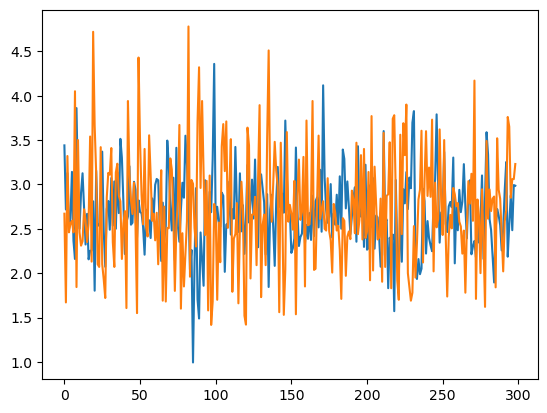

In [36]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [37]:
n_steps = 30
# train
sequence_train = train.to_list()
X_train,Y_train = split_sequence(train, n_steps)

# test
sequence_test = test.to_list()
X_test,Y_test = split_sequence(test, n_steps)

# validate
sequence_validate = validate.to_list()
X_validate,Y_validate = split_sequence(validate, n_steps)

In [38]:
n_features = 1

# define model
model1 = Sequential()
model1.add(InputLayer((n_steps, n_features)))
model1.add(Conv1D(64,kernel_size=2))
model1.add(Flatten())
model1.add(Dense(n_steps,'relu'))
model1.add(Dense(1,'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 64)            192       
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                55710     
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 55,933
Trainable params: 55,933
Non-trainable params: 0
_________________________________________________________________


In [39]:
model1.compile(optimizer=Adam(learning_rate=0.0005), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# fit model
model1.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - 1s 2ms/step - loss: 0.6862 - root_mean_squared_error: 0.8284 - val_loss: 0.4563 - val_root_mean_squared_error: 0.6755
Epoch 2/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5054 - root_mean_squared_error: 0.7109 - val_loss: 0.4601 - val_root_mean_squared_error: 0.6783
Epoch 3/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5069 - root_mean_squared_error: 0.7120 - val_loss: 0.4635 - val_root_mean_squared_error: 0.6808
Epoch 4/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5106 - root_mean_squared_error: 0.7146 - val_loss: 0.4720 - val_root_mean_squared_error: 0.6870
Epoch 5/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5121 - root_mean_squared_error: 0.7156 - val_loss: 0.4801 - val_root_mean_squared_error: 0.6929
Epoch 6/500
82/82 [==============================] - 0s 1ms/step - loss: 0.5124 - root_mean_squared_error: 0.7158 - val_loss: 0.4832 - val_root_m

Epoch 49/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4978 - root_mean_squared_error: 0.7056 - val_loss: 0.4598 - val_root_mean_squared_error: 0.6781
Epoch 50/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4970 - root_mean_squared_error: 0.7050 - val_loss: 0.4567 - val_root_mean_squared_error: 0.6758
Epoch 51/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4969 - root_mean_squared_error: 0.7049 - val_loss: 0.4572 - val_root_mean_squared_error: 0.6762
Epoch 52/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4967 - root_mean_squared_error: 0.7048 - val_loss: 0.4548 - val_root_mean_squared_error: 0.6744
Epoch 53/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4968 - root_mean_squared_error: 0.7048 - val_loss: 0.4573 - val_root_mean_squared_error: 0.6762
Epoch 54/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4965 - root_mean_squared_error: 0.7046 - val_loss: 0.4574 - val_

82/82 [==============================] - 0s 1ms/step - loss: 0.4875 - root_mean_squared_error: 0.6982 - val_loss: 0.4413 - val_root_mean_squared_error: 0.6643
Epoch 97/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4874 - root_mean_squared_error: 0.6981 - val_loss: 0.4414 - val_root_mean_squared_error: 0.6644
Epoch 98/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4876 - root_mean_squared_error: 0.6983 - val_loss: 0.4417 - val_root_mean_squared_error: 0.6646
Epoch 99/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4878 - root_mean_squared_error: 0.6984 - val_loss: 0.4409 - val_root_mean_squared_error: 0.6640
Epoch 100/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4880 - root_mean_squared_error: 0.6985 - val_loss: 0.4406 - val_root_mean_squared_error: 0.6638
Epoch 101/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4878 - root_mean_squared_error: 0.6985 - val_loss: 0.4410 - val_root_mean_s

82/82 [==============================] - 0s 1ms/step - loss: 0.4827 - root_mean_squared_error: 0.6948 - val_loss: 0.4533 - val_root_mean_squared_error: 0.6733
Epoch 144/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4825 - root_mean_squared_error: 0.6946 - val_loss: 0.4543 - val_root_mean_squared_error: 0.6740
Epoch 145/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4823 - root_mean_squared_error: 0.6944 - val_loss: 0.4543 - val_root_mean_squared_error: 0.6741
Epoch 146/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4825 - root_mean_squared_error: 0.6946 - val_loss: 0.4547 - val_root_mean_squared_error: 0.6743
Epoch 147/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4825 - root_mean_squared_error: 0.6946 - val_loss: 0.4547 - val_root_mean_squared_error: 0.6743
Epoch 148/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4821 - root_mean_squared_error: 0.6944 - val_loss: 0.4552 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4806 - root_mean_squared_error: 0.6932 - val_loss: 0.4542 - val_root_mean_squared_error: 0.6740
Epoch 191/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4810 - root_mean_squared_error: 0.6935 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6729
Epoch 192/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4804 - root_mean_squared_error: 0.6931 - val_loss: 0.4527 - val_root_mean_squared_error: 0.6729
Epoch 193/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4806 - root_mean_squared_error: 0.6932 - val_loss: 0.4535 - val_root_mean_squared_error: 0.6734
Epoch 194/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4802 - root_mean_squared_error: 0.6930 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6730
Epoch 195/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4800 - root_mean_squared_error: 0.6928 - val_loss: 0.4547 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4714 - root_mean_squared_error: 0.6866 - val_loss: 0.4574 - val_root_mean_squared_error: 0.6763
Epoch 238/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4710 - root_mean_squared_error: 0.6863 - val_loss: 0.4563 - val_root_mean_squared_error: 0.6755
Epoch 239/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4704 - root_mean_squared_error: 0.6858 - val_loss: 0.4566 - val_root_mean_squared_error: 0.6757
Epoch 240/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4703 - root_mean_squared_error: 0.6858 - val_loss: 0.4579 - val_root_mean_squared_error: 0.6767
Epoch 241/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4703 - root_mean_squared_error: 0.6858 - val_loss: 0.4573 - val_root_mean_squared_error: 0.6763
Epoch 242/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4703 - root_mean_squared_error: 0.6858 - val_loss: 0.4554 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4641 - root_mean_squared_error: 0.6812 - val_loss: 0.4563 - val_root_mean_squared_error: 0.6755
Epoch 285/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4639 - root_mean_squared_error: 0.6811 - val_loss: 0.4552 - val_root_mean_squared_error: 0.6747
Epoch 286/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4637 - root_mean_squared_error: 0.6810 - val_loss: 0.4554 - val_root_mean_squared_error: 0.6748
Epoch 287/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4653 - root_mean_squared_error: 0.6821 - val_loss: 0.4678 - val_root_mean_squared_error: 0.6840
Epoch 288/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4644 - root_mean_squared_error: 0.6815 - val_loss: 0.4557 - val_root_mean_squared_error: 0.6751
Epoch 289/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4633 - root_mean_squared_error: 0.6807 - val_loss: 0.4564 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4488 - root_mean_squared_error: 0.6699 - val_loss: 0.4605 - val_root_mean_squared_error: 0.6786
Epoch 332/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4478 - root_mean_squared_error: 0.6692 - val_loss: 0.4613 - val_root_mean_squared_error: 0.6792
Epoch 333/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4478 - root_mean_squared_error: 0.6691 - val_loss: 0.4597 - val_root_mean_squared_error: 0.6780
Epoch 334/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4464 - root_mean_squared_error: 0.6682 - val_loss: 0.4598 - val_root_mean_squared_error: 0.6781
Epoch 335/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4465 - root_mean_squared_error: 0.6682 - val_loss: 0.4626 - val_root_mean_squared_error: 0.6802
Epoch 336/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4460 - root_mean_squared_error: 0.6678 - val_loss: 0.4620 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4344 - root_mean_squared_error: 0.6591 - val_loss: 0.4871 - val_root_mean_squared_error: 0.6980
Epoch 379/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4342 - root_mean_squared_error: 0.6589 - val_loss: 0.4862 - val_root_mean_squared_error: 0.6973
Epoch 380/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4340 - root_mean_squared_error: 0.6588 - val_loss: 0.4858 - val_root_mean_squared_error: 0.6970
Epoch 381/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4338 - root_mean_squared_error: 0.6586 - val_loss: 0.4852 - val_root_mean_squared_error: 0.6965
Epoch 382/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4339 - root_mean_squared_error: 0.6587 - val_loss: 0.4877 - val_root_mean_squared_error: 0.6984
Epoch 383/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4336 - root_mean_squared_error: 0.6585 - val_loss: 0.4863 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4302 - root_mean_squared_error: 0.6559 - val_loss: 0.4950 - val_root_mean_squared_error: 0.7036
Epoch 426/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4300 - root_mean_squared_error: 0.6558 - val_loss: 0.4949 - val_root_mean_squared_error: 0.7035
Epoch 427/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4295 - root_mean_squared_error: 0.6554 - val_loss: 0.4960 - val_root_mean_squared_error: 0.7043
Epoch 428/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4298 - root_mean_squared_error: 0.6556 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 429/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4300 - root_mean_squared_error: 0.6557 - val_loss: 0.4969 - val_root_mean_squared_error: 0.7049
Epoch 430/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4298 - root_mean_squared_error: 0.6556 - val_loss: 0.4967 - val_root_mea

82/82 [==============================] - 0s 1ms/step - loss: 0.4285 - root_mean_squared_error: 0.6546 - val_loss: 0.4889 - val_root_mean_squared_error: 0.6992
Epoch 473/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4288 - root_mean_squared_error: 0.6548 - val_loss: 0.4899 - val_root_mean_squared_error: 0.6999
Epoch 474/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4283 - root_mean_squared_error: 0.6544 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988
Epoch 475/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4291 - root_mean_squared_error: 0.6551 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6998
Epoch 476/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4289 - root_mean_squared_error: 0.6549 - val_loss: 0.4888 - val_root_mean_squared_error: 0.6992
Epoch 477/500
82/82 [==============================] - 0s 1ms/step - loss: 0.4289 - root_mean_squared_error: 0.6549 - val_loss: 0.4891 - val_root_mea

In [40]:
# demonstrate prediction
Y_hat1 = model1.predict(X_validate, verbose=0)


In [41]:
train_results = pd.DataFrame(data={'Train Predictions':Y_hat1.flatten(),'Actuals':Y_validate})
train_results

,Train Predictions,Actuals
0,3.071754,2.67
1,2.638965,1.67
2,3.035527,3.32
3,2.209489,2.46
4,3.272005,2.56
...,...,...
294,2.944793,3.65
295,2.956830,2.85
296,3.403473,3.06
297,2.762424,3.06


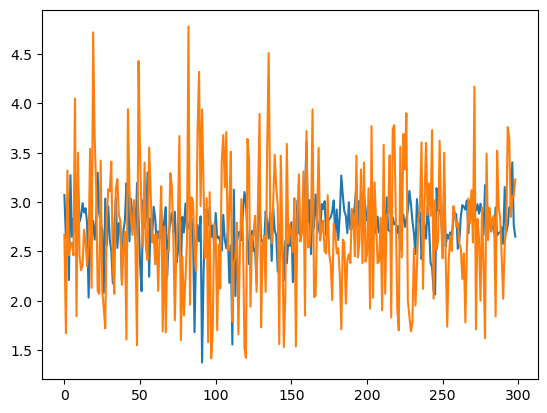

In [42]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

##  Multivariate regression


In [43]:
df1=df[['SP500','Vix','slope',  'GDP','Fed fund rate',  'CPI',  'US-AAA yield']] #Breakeven inflation rate',  'House price index', 'CPI' 'US-AAA yield']

In [44]:
def df_to_X_y2(df,window_size):
    df_as_np = df
    X = []
    Y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][6]
        Y.append(label)

    return np.array(X), np.array(Y)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# input scaling
scaler_input = StandardScaler()
scaler_input.fit(df1)
df_scaled_input = scaler_input.transform(df1)
print(df_scaled_input)

# output scaling
scaler_output = StandardScaler()
scaler_output.fit(df1[["US-AAA yield"]])
df_scaled_output = scaler_output.transform(df1[["US-AAA yield"]])
print(df_scaled_output)


[[-0.08497256 -0.53050313  2.62586511 ... -0.83384085 -1.08724304
   0.27460134]
 [-0.08497256 -0.53050313  2.62586511 ... -0.82328822 -1.08677045
   0.27460134]
 [-0.08497256 -0.59261133  2.61093184 ... -0.82328822 -1.08629786
   0.28912686]
 ...
 [-1.27240151  0.51476475 -1.91384898 ...  3.6615797   2.51603153
   2.87466991]
 [ 1.69647338  0.42226317 -2.03331514 ...  3.6615797   2.51603153
   2.78751677]
 [-0.30820697  0.45265655 -2.06318168 ...  3.6615797   2.51603153
   2.81656782]]
[[0.27460134]
 [0.27460134]
 [0.28912686]
 ...
 [2.87466991]
 [2.78751677]
 [2.81656782]]


In [47]:
df_scaled_input
n_steps = 16

In [48]:
x,y = df_to_X_y2(df_scaled_input,n_steps)
x.shape, y.shape

((3270, 16, 7), (3270,))

In [49]:
def train_test_validate_split(x,y):
    data_len = x.shape[0]
    train_len = int(0.8*data_len)
    test_len  = int(0.9*data_len)

    x_train, y_train = x[:train_len], y[:train_len]
    x_val, y_val = x[train_len:test_len], y[train_len:test_len]
    x_test, y_test = x[test_len:],y[test_len:]

    return x_train, y_train,x_test, y_test,x_val, y_val

In [50]:
x.shape[0]

3270

In [51]:
x_train, y_train,x_test, y_test,x_val, y_val = train_test_validate_split(x,y)

## GRU model


In [52]:
n_features = 7

# define model
model_gru = Sequential()
model_gru.add(InputLayer((n_steps, n_features)))
model_gru.add(GRU(64))
model_gru.add(Dense(n_steps,'relu'))
model_gru.add(Dense(1,'linear'))

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                14016     
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15,073
Trainable params: 15,073
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_gru.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.gru"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')


callbacks_list = [checkpoint]

# fit model
model_gru.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list, verbose=1, shuffle=False)

Epoch 1/500
73/82 [=========================>....] - ETA: 0s - loss: 0.3648 - root_mean_squared_error: 0.6040
Epoch 1: val_loss improved from inf to 1.13398, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 6s 60ms/step - loss: 0.6132 - root_mean_squared_error: 0.7831 - val_loss: 1.1340 - val_root_mean_squared_error: 1.0649
Epoch 2/500
76/82 [==========================>...] - ETA: 0s - loss: 0.3080 - root_mean_squared_error: 0.5550
Epoch 2: val_loss improved from 1.13398 to 0.74074, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.3918 - root_mean_squared_error: 0.6259 - val_loss: 0.7407 - val_root_mean_squared_error: 0.8607
Epoch 3/500
76/82 [==========================>...] - ETA: 0s - loss: 0.2207 - root_mean_squared_error: 0.4698
Epoch 3: val_loss improved from 0.74074 to 0.48949, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.2733 - root_mean_squared_error: 0.5228 - val_loss: 0.4895 - val_root_mean_squared_error: 0.6996
Epoch 4/500
76/82 [==========================>...] - ETA: 0s - loss: 0.1570 - root_mean_squared_error: 0.3962
Epoch 4: val_loss improved from 0.48949 to 0.30403, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.1880 - root_mean_squared_error: 0.4336 - val_loss: 0.3040 - val_root_mean_squared_error: 0.5514
Epoch 5/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0841 - root_mean_squared_error: 0.2900
Epoch 5: val_loss improved from 0.30403 to 0.15622, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.1170 - root_mean_squared_error: 0.3420 - val_loss: 0.1562 - val_root_mean_squared_error: 0.3952
Epoch 6/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0668 - root_mean_squared_error: 0.2584
Epoch 6: val_loss improved from 0.15622 to 0.07228, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2689
Epoch 7/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0410 - root_mean_squared_error: 0.2025
Epoch 7: val_loss improved from 0.07228 to 0.03697, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0416 - root_mean_squared_error: 0.2039 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1923
Epoch 8/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0267 - root_mean_squared_error: 0.1634
Epoch 8: val_loss improved from 0.03697 to 0.02613, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0264 - root_mean_squared_error: 0.1623 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 9/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1359
Epoch 9: val_loss improved from 0.02613 to 0.02335, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0184 - root_mean_squared_error: 0.1358 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1528
Epoch 10/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1210
Epoch 10: val_loss improved from 0.02335 to 0.02231, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1494
Epoch 11/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1117
Epoch 11: val_loss improved from 0.02231 to 0.02158, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1469
Epoch 12/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0114 - root_mean_squared_error: 0.1069
Epoch 12: val_loss improved from 0.02158 to 0.02100, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 13/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1021
Epoch 13: val_loss improved from 0.02100 to 0.02047, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0103 - root_mean_squared_error: 0.1017 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 14/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0097 - root_mean_squared_error: 0.0986
Epoch 14: val_loss improved from 0.02047 to 0.01996, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 15/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0092 - root_mean_squared_error: 0.0961
Epoch 15: val_loss improved from 0.01996 to 0.01945, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1395
Epoch 16/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0088 - root_mean_squared_error: 0.0937
Epoch 16: val_loss improved from 0.01945 to 0.01898, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0086 - root_mean_squared_error: 0.0929 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1378
Epoch 17/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0082 - root_mean_squared_error: 0.0905
Epoch 17: val_loss improved from 0.01898 to 0.01858, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0082 - root_mean_squared_error: 0.0906 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1363
Epoch 18/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0078 - root_mean_squared_error: 0.0884
Epoch 18: val_loss improved from 0.01858 to 0.01823, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0078 - root_mean_squared_error: 0.0885 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1350
Epoch 19/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0867
Epoch 19: val_loss improved from 0.01823 to 0.01796, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0075 - root_mean_squared_error: 0.0866 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1340
Epoch 20/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0848
Epoch 20: val_loss improved from 0.01796 to 0.01774, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0072 - root_mean_squared_error: 0.0849 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 21/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0832
Epoch 21: val_loss improved from 0.01774 to 0.01757, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0069 - root_mean_squared_error: 0.0833 - val_loss: 0.0176 - val_root_mean_squared_error: 0.1326
Epoch 22/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0819
Epoch 22: val_loss improved from 0.01757 to 0.01747, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0067 - root_mean_squared_error: 0.0818 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1322
Epoch 23/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0805
Epoch 23: val_loss improved from 0.01747 to 0.01737, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0065 - root_mean_squared_error: 0.0805 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1318
Epoch 24/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0793
Epoch 24: val_loss improved from 0.01737 to 0.01732, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0063 - root_mean_squared_error: 0.0792 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 25/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0787
Epoch 25: val_loss improved from 0.01732 to 0.01730, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0061 - root_mean_squared_error: 0.0781 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 26/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0772
Epoch 26: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 4ms/step - loss: 0.0059 - root_mean_squared_error: 0.0770 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 27/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0761
Epoch 27: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 4ms/step - loss: 0.0058 - root_mean_squared_error: 0.0759 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 28/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0752
Epoch 28: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 5

78/82 [===========================>..] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0608
Epoch 51: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1329
Epoch 52/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0601
Epoch 52: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 4ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1329
Epoch 53/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0596
Epoch 53: val_loss did not improve from 0.01730
82/82 [==============================] - 0s 4ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0175 - val_root_mean_squared_error: 0.1324
Epoch 54/500
79/82 [===========================>..] - ETA: 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 59/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 59: val_loss improved from 0.01729 to 0.01724, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 60/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0564
Epoch 60: val_loss improved from 0.01724 to 0.01715, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1310
Epoch 61/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 61: val_loss improved from 0.01715 to 0.01701, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 62/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0557
Epoch 62: val_loss improved from 0.01701 to 0.01685, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1298
Epoch 63/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 63: val_loss improved from 0.01685 to 0.01679, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 64/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 64: val_loss improved from 0.01679 to 0.01662, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0030 - root_mean_squared_error: 0.0547 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 65/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 65: val_loss improved from 0.01662 to 0.01647, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0030 - root_mean_squared_error: 0.0543 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 66/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 66: val_loss improved from 0.01647 to 0.01643, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1282
Epoch 67/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 67: val_loss improved from 0.01643 to 0.01610, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 68/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0538
Epoch 68: val_loss improved from 0.01610 to 0.01596, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1263
Epoch 69/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 69: val_loss improved from 0.01596 to 0.01582, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1258
Epoch 70/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0530
Epoch 70: val_loss improved from 0.01582 to 0.01562, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527 - val_loss: 0.0156 - val_root_mean_squared_error: 0.1250
Epoch 71/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 71: val_loss improved from 0.01562 to 0.01549, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1245
Epoch 72/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0526
Epoch 72: val_loss improved from 0.01549 to 0.01531, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 58ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1237
Epoch 73/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 73: val_loss improved from 0.01531 to 0.01527, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1236
Epoch 74/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0519
Epoch 74: val_loss improved from 0.01527 to 0.01505, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 75/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 75: val_loss improved from 0.01505 to 0.01502, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1225
Epoch 76/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0511
Epoch 76: val_loss improved from 0.01502 to 0.01489, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 77/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 77: val_loss improved from 0.01489 to 0.01472, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 78/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0505
Epoch 78: val_loss improved from 0.01472 to 0.01471, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1213
Epoch 79/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 79: val_loss improved from 0.01471 to 0.01454, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 80/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0500
Epoch 80: val_loss improved from 0.01454 to 0.01402, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 81/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 81: val_loss did not improve from 0.01402
82/82 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 82/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0505
Epoch 82: val_loss improved from 0.01402 to 0.01349, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 83/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 83: val_loss did not improve from 0.01349
82/82 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0493 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1230
Epoch 84/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 84: val_loss improved from 0.01349 to 0.01205, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1098
Epoch 85/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0524
Epoch 85: val_loss did not improve from 0.01205
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208
Epoch 86/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0561
Epoch 86: val_loss did not improve from 0.01205
82/82 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1098
Epoch 87/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 87: val_loss did not improve from 0.01205
82/82 [==============================] - 0s 4

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 93/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0514
Epoch 93: val_loss did not improve from 0.01043
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1024
Epoch 94/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 94: val_loss did not improve from 0.01043
82/82 [==============================] - 0s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 95/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0524
Epoch 95: val_loss did not improve from 0.01043
82/82 [==============================] - 0s 4

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 115/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0570
Epoch 115: val_loss improved from 0.00998 to 0.00965, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 57ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0982
Epoch 116/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0515
Epoch 116: val_loss did not improve from 0.00965
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1040
Epoch 117/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 117: val_loss did not improve from 0.00965
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095
Epoch 118/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0545
Epoch 118: val_loss improved from 0.00965 to 0.00888, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 119/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 119: val_loss did not improve from 0.00888
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0970
Epoch 120/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 120: val_loss did not improve from 0.00888
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0508 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1160
Epoch 121/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0588
Epoch 121: val_loss did not improve from 0.00888
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 131/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 131: val_loss did not improve from 0.00828
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0943
Epoch 132/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 132: val_loss did not improve from 0.00828
82/82 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 133/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 133: val_loss did not improve from 0.00828
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0879
Epoch 145/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 145: val_loss did not improve from 0.00773
82/82 [==============================] - 0s 4ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0905
Epoch 146/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0508
Epoch 146: val_loss did not improve from 0.00773
82/82 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0505 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1012
Epoch 147/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0485
Epoch 147: val_loss did not improve from 0.00773
82/82 [==============================] 

79/82 [===========================>..] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0523
Epoch 170: val_loss did not improve from 0.00773
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1039
Epoch 171/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 171: val_loss did not improve from 0.00773
82/82 [==============================] - 0s 4ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0915
Epoch 172/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0457
Epoch 172: val_loss did not improve from 0.00773
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 173/500
79/82 [===========================>..] -

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 175/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0457
Epoch 175: val_loss did not improve from 0.00763
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 176/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 176: val_loss did not improve from 0.00763
82/82 [==============================] - 0s 4ms/step - loss: 0.0026 - root_mean_squared_error: 0.0510 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 177/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0459
Epoch 177: val_loss did not improve from 0.00763
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0034 - root_mean_squared_error: 0.0584 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 199/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0495
Epoch 199: val_loss did not improve from 0.00756
82/82 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0491 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0985
Epoch 200/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0459
Epoch 200: val_loss did not improve from 0.00756
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0458 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 201/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503
Epoch 201: val_loss did not improve from 0.00756
82/82 [==============================] 

79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471
Epoch 224: val_loss did not improve from 0.00756
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882
Epoch 225/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0473
Epoch 225: val_loss did not improve from 0.00756
82/82 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0896
Epoch 226/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0492
Epoch 226: val_loss did not improve from 0.00756
82/82 [==============================] - 0s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0494 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073
Epoch 227/500
79/82 [===========================>..] -

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0856
Epoch 229/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 229: val_loss did not improve from 0.00733
82/82 [==============================] - 0s 4ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 230/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0450
Epoch 230: val_loss did not improve from 0.00733
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 231/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0421
Epoch 231: val_loss did not improve from 0.00733
82/82 [==============================] 

79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 254: val_loss did not improve from 0.00733
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 255/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0473
Epoch 255: val_loss improved from 0.00733 to 0.00707, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 256/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0473
Epoch 256: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0471 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 257/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0421
Epoch 257: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 4ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0910
Epoch 258/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 258: val_loss did not improve from 0.00707
82/82 [==============================] 

79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0461
Epoch 281: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0459 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0908
Epoch 282/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0461
Epoch 282: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 283/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0420
Epoch 283: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 284/500
79/82 [===========================>..] -

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 53ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0825
Epoch 303/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 303: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1031
Epoch 304/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 304: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1058
Epoch 305/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0450
Epoch 305: val_loss did not improve from 0.00681
82/82 [==============================] 

79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 328: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 329/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 329: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0840
Epoch 330/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 330: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 331/500
78/82 [===========================>..] -

Epoch 354/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 354: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0836
Epoch 355/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 355: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0025 - root_mean_squared_error: 0.0502 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0968
Epoch 356/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 356: val_loss did not improve from 0.00681
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0450 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1108
Epoch 357/500
79/82 [===================

Epoch 380/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0482
Epoch 380: val_loss improved from 0.00681 to 0.00679, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 55ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0824
Epoch 381/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 381: val_loss improved from 0.00679 to 0.00654, saving model to weights.best.gru


INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 5s 56ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0809
Epoch 382/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 382: val_loss did not improve from 0.00654
82/82 [==============================] - 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0440 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 383/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0421
Epoch 383: val_loss did not improve from 0.00654
82/82 [==============================] - 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0890
Epoch 384/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0394
Epoch 384: val_loss did not improve from 0.00654
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.gru/assets


INFO:tensorflow:Assets written to: weights.best.gru/assets


82/82 [==============================] - 4s 54ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0782
Epoch 407/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 407: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0025 - root_mean_squared_error: 0.0496 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 408/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0446
Epoch 408: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0442 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0941
Epoch 409/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0395
Epoch 409: val_loss did not improve from 0.00612
82/82 [==============================] 

77/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0398
Epoch 432: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882
Epoch 433/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0418
Epoch 433: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153
Epoch 434/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0407
Epoch 434: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0405 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0898
Epoch 435/500
78/82 [===========================>..] -

Epoch 458/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0400
Epoch 458: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 459/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 459: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0408 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 460/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0399
Epoch 460: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1100
Epoch 461/500
77/82 [===================

Epoch 484/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0418
Epoch 484: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0017 - root_mean_squared_error: 0.0415 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 485/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0452
Epoch 485: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0454 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0814
Epoch 486/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0426
Epoch 486: val_loss did not improve from 0.00612
82/82 [==============================] - 0s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 487/500
78/82 [===================

In [55]:
# demonstrate prediction
y_hat_gru = model_gru.predict(x_val, verbose=0)

In [56]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_gru.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.890021 -0.858389
1            -0.852622 -0.814813
2            -0.846983 -0.843864
3            -0.804804 -0.863231
4            -0.816046 -0.882599
..                 ...       ...
322          -0.612765 -0.495251
323          -0.620475 -0.393573
324          -0.550645 -0.248317
325          -0.486310 -0.258001
326          -0.485114 -0.267685

[327 rows x 2 columns]


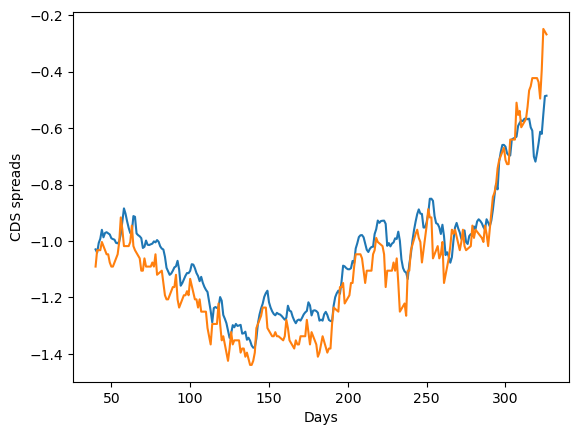

In [57]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('GRU resuts.png')

## 1D Convolutional neural network model

In [58]:
n_features = 7

# define model
model_conv1d = Sequential()
model_conv1d.add(InputLayer((n_steps, n_features)))
model_conv1d.add(Conv1D(64,kernel_size=2))
model_conv1d.add(Flatten())
model_conv1d.add(Dense(n_steps,'relu'))
model_conv1d.add(Dense(1,'linear'))

model_conv1d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 15, 64)            960       
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_6 (Dense)             (None, 16)                15376     
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_conv1d.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.conv1d"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_conv1d.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500,  verbose=1, callbacks=callbacks_list, shuffle=False)

Epoch 1/500
56/82 [===================>..........] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0450 
Epoch 1: val_loss improved from inf to 0.20632, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0020 - root_mean_squared_error: 0.0447 - val_loss: 0.2063 - val_root_mean_squared_error: 0.4542
Epoch 2/500
55/82 [===================>..........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 2: val_loss improved from 0.20632 to 0.15964, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.1596 - val_root_mean_squared_error: 0.3996
Epoch 3/500
53/82 [==================>...........] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 3: val_loss improved from 0.15964 to 0.13649, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.1365 - val_root_mean_squared_error: 0.3694
Epoch 4/500
51/82 [=================>............] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 4: val_loss did not improve from 0.13649
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.1731 - val_root_mean_squared_error: 0.4160
Epoch 5/500
56/82 [===================>..........] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 5: val_loss did not improve from 0.13649
82/82 [==============================] - 0s 1ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.1583 - val_root_mean_squared_error: 0.3978
Epoch 6/500
53/82 [==================>...........] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0551
Epoch 6: val_loss did not improve from 0.13649
82/82 [==============================] - 0s 1ms/step

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.1319 - val_root_mean_squared_error: 0.3631
Epoch 8/500
52/82 [==================>...........] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0593
Epoch 8: val_loss did not improve from 0.13187
82/82 [==============================] - 0s 1ms/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.1379 - val_root_mean_squared_error: 0.3713
Epoch 9/500
56/82 [===================>..........] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0617
Epoch 9: val_loss did not improve from 0.13187
82/82 [==============================] - 0s 1ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585 - val_loss: 0.1556 - val_root_mean_squared_error: 0.3945
Epoch 10/500
57/82 [===================>..........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 10: val_loss did not improve from 0.13187
82/82 [==============================] - 0s 1ms/st

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.1193 - val_root_mean_squared_error: 0.3454
Epoch 26/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 26: val_loss did not improve from 0.11930
82/82 [==============================] - 0s 1ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.1404 - val_root_mean_squared_error: 0.3747
Epoch 27/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 27: val_loss did not improve from 0.11930
82/82 [==============================] - 0s 1ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3531
Epoch 28/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 28: val_loss did not improve from 0.11930
82/82 [==============================] - 0s 1

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.1165 - val_root_mean_squared_error: 0.3413
Epoch 34/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 34: val_loss improved from 0.11650 to 0.10645, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.1064 - val_root_mean_squared_error: 0.3263
Epoch 35/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0575
Epoch 35: val_loss improved from 0.10645 to 0.10398, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3225
Epoch 36/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 36: val_loss did not improve from 0.10398
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.1204 - val_root_mean_squared_error: 0.3470
Epoch 37/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0520
Epoch 37: val_loss improved from 0.10398 to 0.10105, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0506 - val_loss: 0.1010 - val_root_mean_squared_error: 0.3179
Epoch 38/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 38: val_loss did not improve from 0.10105
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0495 - val_loss: 0.1189 - val_root_mean_squared_error: 0.3449
Epoch 39/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 39: val_loss did not improve from 0.10105
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499 - val_loss: 0.1018 - val_root_mean_squared_error: 0.3191
Epoch 40/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0520
Epoch 40: val_loss did not improve from 0.10105
82/82 [==============================] - 0s 1m

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0965 - val_root_mean_squared_error: 0.3107
Epoch 42/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 42: val_loss did not improve from 0.09655
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.1135 - val_root_mean_squared_error: 0.3369
Epoch 43/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 43: val_loss improved from 0.09655 to 0.09238, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0027 - root_mean_squared_error: 0.0524 - val_loss: 0.0924 - val_root_mean_squared_error: 0.3039
Epoch 44/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0501
Epoch 44: val_loss did not improve from 0.09238
82/82 [==============================] - 0s 1ms/step - loss: 0.0024 - root_mean_squared_error: 0.0494 - val_loss: 0.1137 - val_root_mean_squared_error: 0.3372
Epoch 45/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0505
Epoch 45: val_loss did not improve from 0.09238
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0926 - val_root_mean_squared_error: 0.3044
Epoch 46/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0510
Epoch 46: val_loss did not improve from 0.09238
82/82 [==============================] - 0s 1m

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0921 - val_root_mean_squared_error: 0.3035
Epoch 50/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 50: val_loss did not improve from 0.09211
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.1177 - val_root_mean_squared_error: 0.3431
Epoch 51/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 51: val_loss improved from 0.09211 to 0.08719, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0872 - val_root_mean_squared_error: 0.2953
Epoch 52/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0566
Epoch 52: val_loss did not improve from 0.08719
82/82 [==============================] - 0s 1ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.1148 - val_root_mean_squared_error: 0.3388
Epoch 53/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0604
Epoch 53: val_loss improved from 0.08719 to 0.08581, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2929
Epoch 54/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0623
Epoch 54: val_loss did not improve from 0.08581
82/82 [==============================] - 0s 1ms/step - loss: 0.0038 - root_mean_squared_error: 0.0618 - val_loss: 0.1306 - val_root_mean_squared_error: 0.3614
Epoch 55/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0664
Epoch 55: val_loss improved from 0.08581 to 0.08143, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0814 - val_root_mean_squared_error: 0.2854
Epoch 56/500
57/82 [===================>..........] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0748
Epoch 56: val_loss did not improve from 0.08143
82/82 [==============================] - 0s 1ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.1468 - val_root_mean_squared_error: 0.3831
Epoch 57/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0815
Epoch 57: val_loss improved from 0.08143 to 0.07829, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0068 - root_mean_squared_error: 0.0823 - val_loss: 0.0783 - val_root_mean_squared_error: 0.2798
Epoch 58/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0951
Epoch 58: val_loss did not improve from 0.07829
82/82 [==============================] - 0s 1ms/step - loss: 0.0095 - root_mean_squared_error: 0.0973 - val_loss: 0.1558 - val_root_mean_squared_error: 0.3947
Epoch 59/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1105
Epoch 59: val_loss improved from 0.07829 to 0.06601, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0146 - root_mean_squared_error: 0.1210 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2569
Epoch 60/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1186
Epoch 60: val_loss did not improve from 0.06601
82/82 [==============================] - 0s 1ms/step - loss: 0.0178 - root_mean_squared_error: 0.1334 - val_loss: 0.2093 - val_root_mean_squared_error: 0.4575
Epoch 61/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1147
Epoch 61: val_loss did not improve from 0.06601
82/82 [==============================] - 0s 1ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0709 - val_root_mean_squared_error: 0.2663
Epoch 62/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0099 - root_mean_squared_error: 0.0994
Epoch 62: val_loss did not improve from 0.06601
82/82 [==============================] - 0s 1m

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0082 - root_mean_squared_error: 0.0905 - val_loss: 0.0539 - val_root_mean_squared_error: 0.2323
Epoch 66/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0556
Epoch 66: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2858
Epoch 67/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0495
Epoch 67: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2439
Epoch 68/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0463
Epoch 68: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1

58/82 [====================>.........] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0599
Epoch 91: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0063 - root_mean_squared_error: 0.0793 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 92/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 92: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0049 - root_mean_squared_error: 0.0703 - val_loss: 0.1014 - val_root_mean_squared_error: 0.3184
Epoch 93/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 93: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2364
Epoch 94/500
60/82 [====================>.........] - ETA: 

Epoch 117/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 117: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0753 - val_root_mean_squared_error: 0.2744
Epoch 118/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0494
Epoch 118: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - val_loss: 0.1116 - val_root_mean_squared_error: 0.3341
Epoch 119/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0507
Epoch 119: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0695 - val_root_mean_squared_error: 0.2636
Epoch 120/500
61/82 [===================

Epoch 143/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0469
Epoch 143: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2705
Epoch 144/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 144: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.1057 - val_root_mean_squared_error: 0.3251
Epoch 145/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 145: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0039 - root_mean_squared_error: 0.0628 - val_loss: 0.0744 - val_root_mean_squared_error: 0.2728
Epoch 146/500
61/82 [===================

Epoch 169/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 169: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2620
Epoch 170/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 170: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0946 - val_root_mean_squared_error: 0.3075
Epoch 171/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0454
Epoch 171: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2678
Epoch 172/500
61/82 [===================

Epoch 195/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0434
Epoch 195: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2619
Epoch 196/500
63/82 [======================>.......] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0428
Epoch 196: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0025 - root_mean_squared_error: 0.0498 - val_loss: 0.0853 - val_root_mean_squared_error: 0.2920
Epoch 197/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0435
Epoch 197: val_loss did not improve from 0.05395
82/82 [==============================] - 0s 1ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2576
Epoch 198/500
60/82 [===================

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0040 - root_mean_squared_error: 0.0633 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2291
Epoch 210/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 210: val_loss did not improve from 0.05249
82/82 [==============================] - 0s 1ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.0847 - val_root_mean_squared_error: 0.2910
Epoch 211/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0486
Epoch 211: val_loss did not improve from 0.05249
82/82 [==============================] - 0s 1ms/step - loss: 0.0043 - root_mean_squared_error: 0.0654 - val_loss: 0.0562 - val_root_mean_squared_error: 0.2370
Epoch 212/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0484
Epoch 212: val_loss did not improve from 0.05249
82/82 [==============================] -

60/82 [====================>.........] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0462
Epoch 235: val_loss did not improve from 0.05249
82/82 [==============================] - 0s 1ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0622 - val_root_mean_squared_error: 0.2493
Epoch 236/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 236: val_loss did not improve from 0.05249
82/82 [==============================] - 0s 1ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2676
Epoch 237/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0481
Epoch 237: val_loss did not improve from 0.05249
82/82 [==============================] - 0s 1ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0554 - val_root_mean_squared_error: 0.2354
Epoch 238/500
60/82 [====================>.........] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 242/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 242: val_loss did not improve from 0.04372
82/82 [==============================] - 0s 1ms/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2759
Epoch 243/500
64/82 [======================>.......] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0501
Epoch 243: val_loss did not improve from 0.04372
82/82 [==============================] - 0s 1ms/step - loss: 0.0046 - root_mean_squared_error: 0.0678 - val_loss: 0.0565 - val_root_mean_squared_error: 0.2378
Epoch 244/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0466
Epoch 244: val_loss did not improve from 0.04372
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2021
Epoch 246/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 246: val_loss did not improve from 0.04082
82/82 [==============================] - 0s 1ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0860 - val_root_mean_squared_error: 0.2933
Epoch 247/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0441
Epoch 247: val_loss did not improve from 0.04082
82/82 [==============================] - 0s 1ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2434
Epoch 248/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0420
Epoch 248: val_loss did not improve from 0.04082
82/82 [==============================] -

60/82 [====================>.........] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0595
Epoch 271: val_loss did not improve from 0.04082
82/82 [==============================] - 0s 1ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2248
Epoch 272/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0770
Epoch 272: val_loss improved from 0.04082 to 0.03663, saving model to weights.best.conv1d


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 273/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0721
Epoch 273: val_loss did not improve from 0.03663
82/82 [==============================] - 0s 1ms/step - loss: 0.0084 - root_mean_squared_error: 0.0919 - val_loss: 0.0561 - val_root_mean_squared_error: 0.2370
Epoch 274/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0785
Epoch 274: val_loss did not improve from 0.03663
82/82 [==============================] - 0s 1ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0379 - val_root_mean_squared_error: 0.1947
Epoch 275/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0615
Epoch 275: val_loss did not improve from 0.03663
82/82 [==============================] -

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1732
Epoch 277/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 277: val_loss did not improve from 0.03001
82/82 [==============================] - 0s 1ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0983 - val_root_mean_squared_error: 0.3135
Epoch 278/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 278: val_loss did not improve from 0.03001
82/82 [==============================] - 0s 1ms/step - loss: 0.0038 - root_mean_squared_error: 0.0619 - val_loss: 0.0432 - val_root_mean_squared_error: 0.2078
Epoch 279/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0414
Epoch 279: val_loss did not improve from 0.03001
82/82 [==============================] 

Epoch 302/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0373    
Epoch 302: val_loss did not improve from 0.03001
82/82 [==============================] - 0s 1ms/step - loss: 0.0014 - root_mean_squared_error: 0.0372 - val_loss: 0.0713 - val_root_mean_squared_error: 0.2670
Epoch 303/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0375    
Epoch 303: val_loss did not improve from 0.03001
82/82 [==============================] - 0s 1ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - val_loss: 0.0675 - val_root_mean_squared_error: 0.2597
Epoch 304/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0372    
Epoch 304: val_loss did not improve from 0.03001
82/82 [==============================] - 0s 1ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2630
Epoch 305/500
59/82 [=======

INFO:tensorflow:Assets written to: weights.best.conv1d/assets


INFO:tensorflow:Assets written to: weights.best.conv1d/assets


82/82 [==============================] - 1s 8ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1433
Epoch 318/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0310 - root_mean_squared_error: 0.1760
Epoch 318: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0268 - root_mean_squared_error: 0.1638 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 319/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0096 - root_mean_squared_error: 0.0977
Epoch 319: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0614 - val_root_mean_squared_error: 0.2478
Epoch 320/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0868
Epoch 320: val_loss did not improve from 0.02054
82/82 [==============================] -

59/82 [====================>.........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0379
Epoch 343: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0396 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 344/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0382    
Epoch 344: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2008
Epoch 345/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0376    
Epoch 345: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0015 - root_mean_squared_error: 0.0390 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 346/500
60/82 [====================>....

Epoch 369/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0417
Epoch 369: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0418 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1952
Epoch 370/500
55/82 [===================>..........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0411
Epoch 370: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 371/500
58/82 [====================>.........] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0401
Epoch 371: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2038
Epoch 372/500
59/82 [===================

Epoch 395/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0405
Epoch 395: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2132
Epoch 396/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0401
Epoch 396: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0016 - root_mean_squared_error: 0.0405 - val_loss: 0.0457 - val_root_mean_squared_error: 0.2137
Epoch 397/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0404
Epoch 397: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 398/500
59/82 [===================

Epoch 421/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 421: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0412 - val_loss: 0.0468 - val_root_mean_squared_error: 0.2164
Epoch 422/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0408
Epoch 422: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0413 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2038
Epoch 423/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0422
Epoch 423: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2081
Epoch 424/500
59/82 [===================

Epoch 447/500
46/82 [===============>..............] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0423
Epoch 447: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0414 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2044
Epoch 448/500
61/82 [=====================>........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0412
Epoch 448: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0420 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2154
Epoch 449/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0429
Epoch 449: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2089
Epoch 450/500
60/82 [===================

Epoch 473/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0409
Epoch 473: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0410 - val_loss: 0.0432 - val_root_mean_squared_error: 0.2078
Epoch 474/500
62/82 [=====================>........] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0401
Epoch 474: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0495 - val_root_mean_squared_error: 0.2226
Epoch 475/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0424
Epoch 475: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - val_loss: 0.0489 - val_root_mean_squared_error: 0.2211
Epoch 476/500
59/82 [===================

Epoch 499/500
60/82 [====================>.........] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0438
Epoch 499: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0019 - root_mean_squared_error: 0.0431 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2014
Epoch 500/500
59/82 [====================>.........] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0424
Epoch 500: val_loss did not improve from 0.02054
82/82 [==============================] - 0s 1ms/step - loss: 0.0018 - root_mean_squared_error: 0.0421 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2013


In [86]:
y_hat_conv1d = model_conv1d.predict(x_val, verbose=0)

In [87]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_conv1d.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.865159 -0.858389
1            -0.860780 -0.814813
2            -0.814103 -0.843864
3            -0.823665 -0.863231
4            -0.878334 -0.882599
..                 ...       ...
322          -0.482010 -0.495251
323          -0.682892 -0.393573
324          -0.410371 -0.248317
325          -0.105241 -0.258001
326          -0.254512 -0.267685

[327 rows x 2 columns]


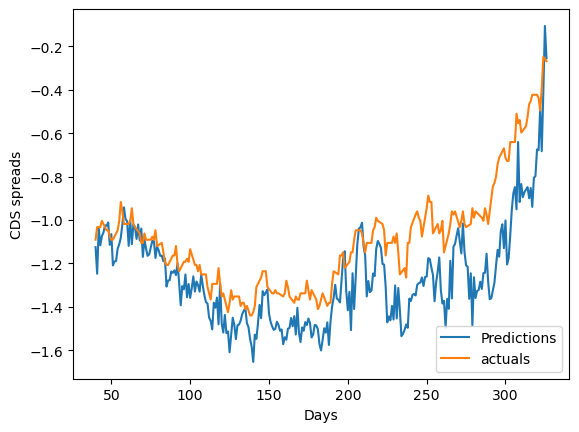

In [88]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('Conv1D results.png')

### LSTM model

In [63]:
n_features = 7

# define model
model_lstm = Sequential()
model_lstm.add(InputLayer((n_steps, n_features)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(n_steps,'relu'))
model_lstm.add(Dense(1,'linear'))

model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18432     
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 19,489
Trainable params: 19,489
Non-trainable params: 0
_________________________________________________________________


In [64]:
# cp = ModelCheckpoint('/model_lstm/', save_best_only = True)

model_lstm.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.lstm"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_lstm.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list,  verbose=1, shuffle=False)

Epoch 1/500
82/82 [==============================] - ETA: 0s - loss: 0.4474 - root_mean_squared_error: 0.6689
Epoch 1: val_loss improved from inf to 0.98144, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 7s 66ms/step - loss: 0.4474 - root_mean_squared_error: 0.6689 - val_loss: 0.9814 - val_root_mean_squared_error: 0.9907
Epoch 2/500
72/82 [=========================>....] - ETA: 0s - loss: 0.1779 - root_mean_squared_error: 0.4218
Epoch 2: val_loss improved from 0.98144 to 0.61529, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.2931 - root_mean_squared_error: 0.5414 - val_loss: 0.6153 - val_root_mean_squared_error: 0.7844
Epoch 3/500
72/82 [=========================>....] - ETA: 0s - loss: 0.1134 - root_mean_squared_error: 0.3368
Epoch 3: val_loss improved from 0.61529 to 0.26559, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.1584 - root_mean_squared_error: 0.3980 - val_loss: 0.2656 - val_root_mean_squared_error: 0.5154
Epoch 4/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0623 - root_mean_squared_error: 0.2495
Epoch 4: val_loss improved from 0.26559 to 0.07736, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0632 - root_mean_squared_error: 0.2515 - val_loss: 0.0774 - val_root_mean_squared_error: 0.2781
Epoch 5/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0372 - root_mean_squared_error: 0.1928
Epoch 5: val_loss improved from 0.07736 to 0.05670, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0340 - root_mean_squared_error: 0.1845 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2381
Epoch 6/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0279 - root_mean_squared_error: 0.1671
Epoch 6: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0257 - root_mean_squared_error: 0.1605 - val_loss: 0.0615 - val_root_mean_squared_error: 0.2480
Epoch 7/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1516
Epoch 7: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0213 - root_mean_squared_error: 0.1459 - val_loss: 0.0647 - val_root_mean_squared_error: 0.2544
Epoch 8/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0195 - root_mean_squared_error: 0.1395
Epoch 8: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/ste

72/82 [=========================>....] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0865
Epoch 31: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0073 - root_mean_squared_error: 0.0855 - val_loss: 0.0789 - val_root_mean_squared_error: 0.2808
Epoch 32/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0075 - root_mean_squared_error: 0.0864
Epoch 32: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0072 - root_mean_squared_error: 0.0847 - val_loss: 0.0789 - val_root_mean_squared_error: 0.2808
Epoch 33/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0856
Epoch 33: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0071 - root_mean_squared_error: 0.0840 - val_loss: 0.0791 - val_root_mean_squared_error: 0.2812
Epoch 34/500
73/82 [=========================>....] - ETA: 

Epoch 57/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0787
Epoch 57: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2640
Epoch 58/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0848
Epoch 58: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0069 - root_mean_squared_error: 0.0831 - val_loss: 0.0745 - val_root_mean_squared_error: 0.2730
Epoch 59/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0085 - root_mean_squared_error: 0.0922
Epoch 59: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0080 - root_mean_squared_error: 0.0897 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2641
Epoch 60/500
73/82 [=========================>

Epoch 83/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0069 - root_mean_squared_error: 0.0833
Epoch 83: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0066 - root_mean_squared_error: 0.0812 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2556
Epoch 84/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0793
Epoch 84: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2518
Epoch 85/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.0843
Epoch 85: val_loss did not improve from 0.05670
82/82 [==============================] - 0s 5ms/step - loss: 0.0067 - root_mean_squared_error: 0.0821 - val_loss: 0.0645 - val_root_mean_squared_error: 0.2541
Epoch 86/500
72/82 [=========================>

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0559 - val_root_mean_squared_error: 0.2364
Epoch 105/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0787
Epoch 105: val_loss did not improve from 0.05588
82/82 [==============================] - 0s 5ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771 - val_loss: 0.0564 - val_root_mean_squared_error: 0.2374
Epoch 106/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0752
Epoch 106: val_loss did not improve from 0.05588
82/82 [==============================] - 0s 5ms/step - loss: 0.0054 - root_mean_squared_error: 0.0734 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2383
Epoch 107/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0804
Epoch 107: val_loss improved from 0.05588 to 0.05454, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0061 - root_mean_squared_error: 0.0780 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2335
Epoch 108/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0759
Epoch 108: val_loss did not improve from 0.05454
82/82 [==============================] - 0s 5ms/step - loss: 0.0056 - root_mean_squared_error: 0.0751 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 109/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0804
Epoch 109: val_loss did not improve from 0.05454
82/82 [==============================] - 0s 5ms/step - loss: 0.0062 - root_mean_squared_error: 0.0788 - val_loss: 0.0561 - val_root_mean_squared_error: 0.2368
Epoch 110/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0762
Epoch 110: val_loss improved from 0.05454 to 0.05268, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2295
Epoch 111/500
82/82 [==============================] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0800
Epoch 111: val_loss did not improve from 0.05268
82/82 [==============================] - 0s 5ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800 - val_loss: 0.0528 - val_root_mean_squared_error: 0.2299
Epoch 112/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0742
Epoch 112: val_loss did not improve from 0.05268
82/82 [==============================] - 0s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2373
Epoch 113/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0819
Epoch 113: val_loss did not improve from 0.05268
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0063 - root_mean_squared_error: 0.0794 - val_loss: 0.0464 - val_root_mean_squared_error: 0.2154
Epoch 115/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0749
Epoch 115: val_loss did not improve from 0.04640
82/82 [==============================] - 0s 5ms/step - loss: 0.0060 - root_mean_squared_error: 0.0774 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2294
Epoch 116/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0790
Epoch 116: val_loss did not improve from 0.04640
82/82 [==============================] - 0s 5ms/step - loss: 0.0061 - root_mean_squared_error: 0.0783 - val_loss: 0.0575 - val_root_mean_squared_error: 0.2397
Epoch 117/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0812
Epoch 117: val_loss did not improve from 0.04640
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2150
Epoch 131/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0731
Epoch 131: val_loss did not improve from 0.04624
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.0510 - val_root_mean_squared_error: 0.2258
Epoch 132/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0699
Epoch 132: val_loss did not improve from 0.04624
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2159
Epoch 133/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0735
Epoch 133: val_loss did not improve from 0.04624
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2114
Epoch 137/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0728
Epoch 137: val_loss did not improve from 0.04468
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0715 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197
Epoch 138/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0701
Epoch 138: val_loss did not improve from 0.04468
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0462 - val_root_mean_squared_error: 0.2150
Epoch 139/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0747
Epoch 139: val_loss did not improve from 0.04468
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0047 - root_mean_squared_error: 0.0688 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2048
Epoch 143/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0727
Epoch 143: val_loss did not improve from 0.04193
82/82 [==============================] - 0s 5ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0467 - val_root_mean_squared_error: 0.2162
Epoch 144/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0687
Epoch 144: val_loss did not improve from 0.04193
82/82 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0476 - val_root_mean_squared_error: 0.2183
Epoch 145/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0729
Epoch 145: val_loss did not improve from 0.04193
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 0.0414 - val_root_mean_squared_error: 0.2035
Epoch 147/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0721
Epoch 147: val_loss did not improve from 0.04141
82/82 [==============================] - 0s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0499 - val_root_mean_squared_error: 0.2233
Epoch 148/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 148: val_loss did not improve from 0.04141
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0434 - val_root_mean_squared_error: 0.2082
Epoch 149/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0054 - root_mean_squared_error: 0.0732
Epoch 149: val_loss did not improve from 0.04141
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0042 - root_mean_squared_error: 0.0647 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2012
Epoch 157/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0697
Epoch 157: val_loss did not improve from 0.04050
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0685 - val_loss: 0.0456 - val_root_mean_squared_error: 0.2136
Epoch 158/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0654
Epoch 158: val_loss did not improve from 0.04050
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2018
Epoch 159/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0669
Epoch 159: val_loss did not improve from 0.04050
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0046 - root_mean_squared_error: 0.0677 - val_loss: 0.0396 - val_root_mean_squared_error: 0.1989
Epoch 163/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0701
Epoch 163: val_loss did not improve from 0.03956
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2088
Epoch 164/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0673
Epoch 164: val_loss improved from 0.03956 to 0.03857, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0043 - root_mean_squared_error: 0.0659 - val_loss: 0.0386 - val_root_mean_squared_error: 0.1964
Epoch 165/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0704
Epoch 165: val_loss did not improve from 0.03857
82/82 [==============================] - 0s 5ms/step - loss: 0.0048 - root_mean_squared_error: 0.0691 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2076
Epoch 166/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0664
Epoch 166: val_loss did not improve from 0.03857
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2027
Epoch 167/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0720
Epoch 167: val_loss did not improve from 0.03857
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1888
Epoch 169/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0704
Epoch 169: val_loss did not improve from 0.03565
82/82 [==============================] - 0s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0699 - val_loss: 0.0435 - val_root_mean_squared_error: 0.2087
Epoch 170/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0678
Epoch 170: val_loss did not improve from 0.03565
82/82 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0668 - val_loss: 0.0405 - val_root_mean_squared_error: 0.2013
Epoch 171/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0713
Epoch 171: val_loss did not improve from 0.03565
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 179/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0655
Epoch 179: val_loss did not improve from 0.03558
82/82 [==============================] - 0s 5ms/step - loss: 0.0044 - root_mean_squared_error: 0.0661 - val_loss: 0.0427 - val_root_mean_squared_error: 0.2067
Epoch 180/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0603
Epoch 180: val_loss did not improve from 0.03558
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0598 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1932
Epoch 181/500
82/82 [==============================] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0603
Epoch 181: val_loss did not improve from 0.03558
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869
Epoch 185/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0648
Epoch 185: val_loss did not improve from 0.03494
82/82 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0636 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2011
Epoch 186/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0618
Epoch 186: val_loss did not improve from 0.03494
82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 187/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0656
Epoch 187: val_loss did not improve from 0.03494
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0040 - root_mean_squared_error: 0.0632 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 189/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0689
Epoch 189: val_loss did not improve from 0.03367
82/82 [==============================] - 0s 5ms/step - loss: 0.0046 - root_mean_squared_error: 0.0675 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2008
Epoch 190/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0648
Epoch 190: val_loss did not improve from 0.03367
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1868
Epoch 191/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0657
Epoch 191: val_loss did not improve from 0.03367
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815
Epoch 193/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0691
Epoch 193: val_loss did not improve from 0.03293
82/82 [==============================] - 0s 5ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 194/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0652
Epoch 194: val_loss did not improve from 0.03293
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 195/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0658
Epoch 195: val_loss did not improve from 0.03293
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0317 - val_root_mean_squared_error: 0.1781
Epoch 197/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0675
Epoch 197: val_loss did not improve from 0.03170
82/82 [==============================] - 0s 5ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0380 - val_root_mean_squared_error: 0.1948
Epoch 198/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0630
Epoch 198: val_loss did not improve from 0.03170
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0333 - val_root_mean_squared_error: 0.1825
Epoch 199/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0660
Epoch 199: val_loss did not improve from 0.03170
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 66ms/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0300 - val_root_mean_squared_error: 0.1733
Epoch 201/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0660
Epoch 201: val_loss did not improve from 0.03003
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0650 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1933
Epoch 202/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0624
Epoch 202: val_loss did not improve from 0.03003
82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 203/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0647
Epoch 203: val_loss did not improve from 0.03003
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0044 - root_mean_squared_error: 0.0664 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1719
Epoch 205/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0047 - root_mean_squared_error: 0.0687
Epoch 205: val_loss did not improve from 0.02955
82/82 [==============================] - 0s 5ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1967
Epoch 206/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0642
Epoch 206: val_loss did not improve from 0.02955
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1756
Epoch 207/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0679
Epoch 207: val_loss did not improve from 0.02955
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0039 - root_mean_squared_error: 0.0625 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1676
Epoch 215/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0665
Epoch 215: val_loss did not improve from 0.02809
82/82 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0651 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 216/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0608
Epoch 216: val_loss did not improve from 0.02809
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1755
Epoch 217/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0602
Epoch 217: val_loss did not improve from 0.02809
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1675
Epoch 223/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0630
Epoch 223: val_loss did not improve from 0.02807
82/82 [==============================] - 0s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0612 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1810
Epoch 224/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0613
Epoch 224: val_loss improved from 0.02807 to 0.02674, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1635
Epoch 225/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0641
Epoch 225: val_loss did not improve from 0.02674
82/82 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815
Epoch 226/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0616
Epoch 226: val_loss did not improve from 0.02674
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0604 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 227/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0626
Epoch 227: val_loss did not improve from 0.02674
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625
Epoch 229/500
82/82 [==============================] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0639
Epoch 229: val_loss did not improve from 0.02641
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0639 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1788
Epoch 230/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0656
Epoch 230: val_loss improved from 0.02641 to 0.02573, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0042 - root_mean_squared_error: 0.0646 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1604
Epoch 231/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 231: val_loss did not improve from 0.02573
82/82 [==============================] - 0s 5ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1771
Epoch 232/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0624
Epoch 232: val_loss improved from 0.02573 to 0.02560, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1600
Epoch 233/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0044 - root_mean_squared_error: 0.0660
Epoch 233: val_loss did not improve from 0.02560
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0641 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1766
Epoch 234/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0648
Epoch 234: val_loss improved from 0.02560 to 0.02480, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - val_loss: 0.0248 - val_root_mean_squared_error: 0.1575
Epoch 235/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 235: val_loss did not improve from 0.02480
82/82 [==============================] - 0s 5ms/step - loss: 0.0044 - root_mean_squared_error: 0.0662 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1767
Epoch 236/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0628
Epoch 236: val_loss improved from 0.02480 to 0.02439, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1562
Epoch 237/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0631
Epoch 237: val_loss did not improve from 0.02439
82/82 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0623 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1761
Epoch 238/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0596
Epoch 238: val_loss did not improve from 0.02439
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603
Epoch 239/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0643
Epoch 239: val_loss did not improve from 0.02439
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0046 - root_mean_squared_error: 0.0678 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1558
Epoch 241/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0627
Epoch 241: val_loss did not improve from 0.02427
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1737
Epoch 242/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 242: val_loss did not improve from 0.02427
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0259 - val_root_mean_squared_error: 0.1608
Epoch 243/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0617
Epoch 243: val_loss did not improve from 0.02427
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 65ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 245/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0647
Epoch 245: val_loss did not improve from 0.02211
82/82 [==============================] - 0s 5ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1736
Epoch 246/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0612
Epoch 246: val_loss did not improve from 0.02211
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0249 - val_root_mean_squared_error: 0.1580
Epoch 247/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0572
Epoch 247: val_loss did not improve from 0.02211
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 255/500
82/82 [==============================] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0626
Epoch 255: val_loss did not improve from 0.02082
82/82 [==============================] - 0s 5ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0285 - val_root_mean_squared_error: 0.1688
Epoch 256/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0622
Epoch 256: val_loss did not improve from 0.02082
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0215 - val_root_mean_squared_error: 0.1466
Epoch 257/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0619
Epoch 257: val_loss did not improve from 0.02082
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 6s 70ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 259/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0627
Epoch 259: val_loss did not improve from 0.02042
82/82 [==============================] - 0s 5ms/step - loss: 0.0038 - root_mean_squared_error: 0.0615 - val_loss: 0.0282 - val_root_mean_squared_error: 0.1678
Epoch 260/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0636
Epoch 260: val_loss did not improve from 0.02042
82/82 [==============================] - 0s 6ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0204 - val_root_mean_squared_error: 0.1429
Epoch 261/500
80/82 [============================>.] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0630
Epoch 261: val_loss did not improve from 0.02042
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1398
Epoch 263/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0619
Epoch 263: val_loss did not improve from 0.01954
82/82 [==============================] - 0s 5ms/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1662
Epoch 264/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0591
Epoch 264: val_loss did not improve from 0.01954
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0578 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1431
Epoch 265/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0601
Epoch 265: val_loss did not improve from 0.01954
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 67ms/step - loss: 0.0035 - root_mean_squared_error: 0.0596 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1372
Epoch 267/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0600
Epoch 267: val_loss did not improve from 0.01883
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1633
Epoch 268/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 268: val_loss did not improve from 0.01883
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434
Epoch 269/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 269: val_loss did not improve from 0.01883
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0033 - root_mean_squared_error: 0.0570 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1359
Epoch 271/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0600
Epoch 271: val_loss did not improve from 0.01846
82/82 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1614
Epoch 272/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 272: val_loss did not improve from 0.01846
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1411
Epoch 273/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 273: val_loss did not improve from 0.01846
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0181 - val_root_mean_squared_error: 0.1344
Epoch 279/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0587
Epoch 279: val_loss did not improve from 0.01807
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1630
Epoch 280/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0590
Epoch 280: val_loss did not improve from 0.01807
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1355
Epoch 281/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0616
Epoch 281: val_loss did not improve from 0.01807
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0034 - root_mean_squared_error: 0.0586 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1332
Epoch 283/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 283: val_loss did not improve from 0.01774
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1596
Epoch 284/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 284: val_loss did not improve from 0.01774
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1364
Epoch 285/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0579
Epoch 285: val_loss did not improve from 0.01774
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 287/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 287: val_loss did not improve from 0.01728
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1562
Epoch 288/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 288: val_loss did not improve from 0.01728
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1357
Epoch 289/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 289: val_loss did not improve from 0.01728
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1269
Epoch 291/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0596
Epoch 291: val_loss did not improve from 0.01610
82/82 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0244 - val_root_mean_squared_error: 0.1563
Epoch 292/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0590
Epoch 292: val_loss did not improve from 0.01610
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0580 - val_loss: 0.0184 - val_root_mean_squared_error: 0.1358
Epoch 293/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 293: val_loss did not improve from 0.01610
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1263
Epoch 299/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 299: val_loss did not improve from 0.01596
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1554
Epoch 300/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 300: val_loss did not improve from 0.01596
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0552 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1272
Epoch 301/500
80/82 [============================>.] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0580
Epoch 301: val_loss did not improve from 0.01596
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1236
Epoch 303/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 303: val_loss did not improve from 0.01527
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 304/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 304: val_loss did not improve from 0.01527
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1292
Epoch 305/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 305: val_loss did not improve from 0.01527
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0031 - root_mean_squared_error: 0.0559 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 307/500
82/82 [==============================] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0588
Epoch 307: val_loss did not improve from 0.01466
82/82 [==============================] - 0s 5ms/step - loss: 0.0035 - root_mean_squared_error: 0.0588 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1496
Epoch 308/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 308: val_loss did not improve from 0.01466
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1274
Epoch 309/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0558
Epoch 309: val_loss did not improve from 0.01466
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0031 - root_mean_squared_error: 0.0557 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200
Epoch 317/500
82/82 [==============================] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0575
Epoch 317: val_loss did not improve from 0.01441
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0575 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1443
Epoch 318/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0576
Epoch 318: val_loss did not improve from 0.01441
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1215
Epoch 319/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 319: val_loss did not improve from 0.01441
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0031 - root_mean_squared_error: 0.0554 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1161
Epoch 323/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0572
Epoch 323: val_loss did not improve from 0.01348
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 324/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0563
Epoch 324: val_loss did not improve from 0.01348
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 325/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 325: val_loss did not improve from 0.01348
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0030 - root_mean_squared_error: 0.0552 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132
Epoch 333/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0586
Epoch 333: val_loss did not improve from 0.01282
82/82 [==============================] - 0s 5ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1405
Epoch 334/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 334: val_loss did not improve from 0.01282
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 335/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0560
Epoch 335: val_loss did not improve from 0.01282
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 59ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 343/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 343: val_loss did not improve from 0.01249
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.0205 - val_root_mean_squared_error: 0.1432
Epoch 344/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0035 - root_mean_squared_error: 0.0587
Epoch 344: val_loss improved from 0.01249 to 0.01171, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 345/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0582
Epoch 345: val_loss did not improve from 0.01171
82/82 [==============================] - 0s 5ms/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1364
Epoch 346/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0550
Epoch 346: val_loss did not improve from 0.01171
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1115
Epoch 347/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0554
Epoch 347: val_loss did not improve from 0.01171
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 355/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0569
Epoch 355: val_loss did not improve from 0.01113
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1352
Epoch 356/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 356: val_loss did not improve from 0.01113
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 357/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0552
Epoch 357: val_loss did not improve from 0.01113
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 359/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 359: val_loss did not improve from 0.01085
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0185 - val_root_mean_squared_error: 0.1361
Epoch 360/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0575
Epoch 360: val_loss improved from 0.01085 to 0.01084, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1041
Epoch 361/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0563
Epoch 361: val_loss did not improve from 0.01084
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0171 - val_root_mean_squared_error: 0.1307
Epoch 362/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 362: val_loss did not improve from 0.01084
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0520 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 363/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 363: val_loss did not improve from 0.01084
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0031 - root_mean_squared_error: 0.0555 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 371/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0565
Epoch 371: val_loss did not improve from 0.01004
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0558 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1304
Epoch 372/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0552
Epoch 372: val_loss did not improve from 0.01004
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 373/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 373: val_loss did not improve from 0.01004
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0033 - root_mean_squared_error: 0.0570 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 377/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 377: val_loss did not improve from 0.01001
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0162 - val_root_mean_squared_error: 0.1273
Epoch 378/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0574
Epoch 378: val_loss improved from 0.01001 to 0.00999, saving model to weights.best.lstm


INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0031 - root_mean_squared_error: 0.0560 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0999
Epoch 379/500
80/82 [============================>.] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0555
Epoch 379: val_loss did not improve from 0.00999
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 380/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 380: val_loss did not improve from 0.00999
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1002
Epoch 381/500
78/82 [===========================>..] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0567
Epoch 381: val_loss did not improve from 0.00999
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 63ms/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 383/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 383: val_loss did not improve from 0.00935
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1280
Epoch 384/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0545
Epoch 384: val_loss did not improve from 0.00935
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1023
Epoch 385/500
75/82 [==========================>...] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0529
Epoch 385: val_loss did not improve from 0.00935
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0030 - root_mean_squared_error: 0.0548 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0961
Epoch 389/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 389: val_loss did not improve from 0.00923
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0547 - val_loss: 0.0154 - val_root_mean_squared_error: 0.1240
Epoch 390/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0559
Epoch 390: val_loss did not improve from 0.00923
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0978
Epoch 391/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 391: val_loss did not improve from 0.00923
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 393/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0560
Epoch 393: val_loss did not improve from 0.00863
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0556 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1244
Epoch 394/500
81/82 [============================>.] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 394: val_loss did not improve from 0.00863
82/82 [==============================] - 0s 5ms/step - loss: 0.0031 - root_mean_squared_error: 0.0561 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 395/500
81/82 [============================>.] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0547
Epoch 395: val_loss did not improve from 0.00863
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 397/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 397: val_loss did not improve from 0.00858
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1232
Epoch 398/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0539
Epoch 398: val_loss did not improve from 0.00858
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0967
Epoch 399/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0534
Epoch 399: val_loss did not improve from 0.00858
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0922
Epoch 403/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0543
Epoch 403: val_loss did not improve from 0.00849
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0531 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191
Epoch 404/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0546
Epoch 404: val_loss did not improve from 0.00849
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0536 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0928
Epoch 405/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0544
Epoch 405: val_loss did not improve from 0.00849
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0899
Epoch 407/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0549
Epoch 407: val_loss did not improve from 0.00808
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1188
Epoch 408/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0553
Epoch 408: val_loss did not improve from 0.00808
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 409/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0545
Epoch 409: val_loss did not improve from 0.00808
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880
Epoch 411/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0537
Epoch 411: val_loss did not improve from 0.00774
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0523 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 412/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0528
Epoch 412: val_loss did not improve from 0.00774
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0932
Epoch 413/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 413: val_loss did not improve from 0.00774
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0875
Epoch 421/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0534
Epoch 421: val_loss did not improve from 0.00766
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 422/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0540
Epoch 422: val_loss did not improve from 0.00766
82/82 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0880
Epoch 423/500
81/82 [============================>.] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0521
Epoch 423: val_loss did not improve from 0.00766
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0027 - root_mean_squared_error: 0.0515 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 425/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0527
Epoch 425: val_loss did not improve from 0.00737
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 426/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 426: val_loss did not improve from 0.00737
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0892
Epoch 427/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0518
Epoch 427: val_loss did not improve from 0.00737
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 64ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0851
Epoch 433/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 433: val_loss did not improve from 0.00724
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1093
Epoch 434/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 434: val_loss did not improve from 0.00724
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 435/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0518
Epoch 435: val_loss did not improve from 0.00724
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 61ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0845
Epoch 439/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0577
Epoch 439: val_loss did not improve from 0.00714
82/82 [==============================] - 0s 5ms/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 440/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0568
Epoch 440: val_loss did not improve from 0.00714
82/82 [==============================] - 0s 5ms/step - loss: 0.0030 - root_mean_squared_error: 0.0550 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 441/500
82/82 [==============================] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0532
Epoch 441: val_loss did not improve from 0.00714
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 65ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0841
Epoch 455/500
82/82 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 455: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0522 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1096
Epoch 456/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 456: val_loss did not improve from 0.00707
82/82 [==============================] - 0s 5ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 457/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 457: val_loss did not improve from 0.00707
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 60ms/step - loss: 0.0029 - root_mean_squared_error: 0.0538 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833
Epoch 463/500
82/82 [==============================] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0516
Epoch 463: val_loss did not improve from 0.00693
82/82 [==============================] - 0s 5ms/step - loss: 0.0027 - root_mean_squared_error: 0.0516 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1062
Epoch 464/500
74/82 [==========================>...] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0525
Epoch 464: val_loss did not improve from 0.00693
82/82 [==============================] - 0s 5ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0858
Epoch 465/500
82/82 [==============================] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 465: val_loss did not improve from 0.00693
82/82 [==============================] 

INFO:tensorflow:Assets written to: weights.best.lstm/assets


INFO:tensorflow:Assets written to: weights.best.lstm/assets


82/82 [==============================] - 5s 62ms/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 475/500
72/82 [=========================>....] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0501
Epoch 475: val_loss did not improve from 0.00689
82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0489 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1037
Epoch 476/500
71/82 [========================>.....] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0488
Epoch 476: val_loss did not improve from 0.00689
82/82 [==============================] - 0s 5ms/step - loss: 0.0023 - root_mean_squared_error: 0.0479 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 477/500
73/82 [=========================>....] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471
Epoch 477: val_loss did not improve from 0.00689
82/82 [==============================] 

72/82 [=========================>....] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 500: val_loss did not improve from 0.00689
82/82 [==============================] - 0s 5ms/step - loss: 0.0024 - root_mean_squared_error: 0.0486 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0859


In [65]:
# from keras.models import load_model
# model_lstm = load_model('model_lstm/')

In [66]:
y_hat_lstm = model_lstm.predict(x_val, verbose=0)

In [67]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_lstm.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.887553 -0.858389
1            -0.866127 -0.814813
2            -0.827418 -0.843864
3            -0.809949 -0.863231
4            -0.811880 -0.882599
..                 ...       ...
322          -0.570877 -0.495251
323          -0.617852 -0.393573
324          -0.606563 -0.248317
325          -0.520116 -0.258001
326          -0.487072 -0.267685

[327 rows x 2 columns]


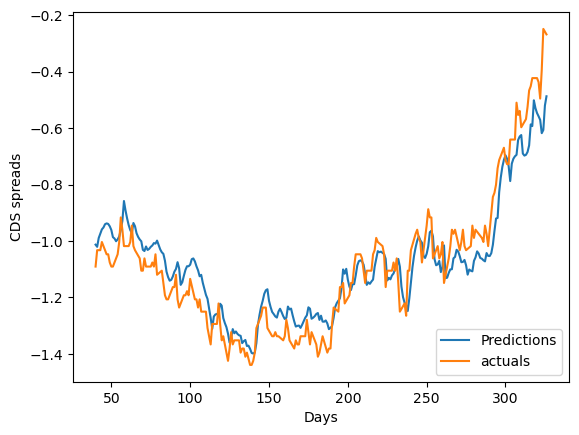

In [68]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('LSTM results.png')

## Feedforward NN model

In [69]:
n_features = 7

# define model
model_nn = Sequential()
model_nn.add(InputLayer((n_steps, n_features)))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Dense(n_steps,'relu'))
model_nn.add(Flatten())
model_nn.add(Dense(1,'linear'))


model_nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16, 16)            128       
                                                                 
 dense_11 (Dense)            (None, 16, 16)            272       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [70]:

model_nn.compile(optimizer=Adam(learning_rate=0.0001), loss=MeanSquaredError(), metrics = RootMeanSquaredError())

# checkpoint
filepath="weights.best.nn"
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

callbacks_list = [checkpoint]



# fit model
model_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, callbacks=callbacks_list, verbose=1, shuffle=False)

Epoch 1/500
75/82 [==========================>...] - ETA: 0s - loss: 0.5231 - root_mean_squared_error: 0.7232 
Epoch 1: val_loss improved from inf to 1.72478, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 14ms/step - loss: 0.7578 - root_mean_squared_error: 0.8705 - val_loss: 1.7248 - val_root_mean_squared_error: 1.3133
Epoch 2/500
79/82 [===========================>..] - ETA: 0s - loss: 0.6011 - root_mean_squared_error: 0.7753
Epoch 2: val_loss improved from 1.72478 to 1.26639, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.6540 - root_mean_squared_error: 0.8087 - val_loss: 1.2664 - val_root_mean_squared_error: 1.1253
Epoch 3/500
80/82 [============================>.] - ETA: 0s - loss: 0.5520 - root_mean_squared_error: 0.7429
Epoch 3: val_loss improved from 1.26639 to 0.92810, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.5715 - root_mean_squared_error: 0.7560 - val_loss: 0.9281 - val_root_mean_squared_error: 0.9634
Epoch 4/500
76/82 [==========================>...] - ETA: 0s - loss: 0.3863 - root_mean_squared_error: 0.6216
Epoch 4: val_loss improved from 0.92810 to 0.66779, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.4955 - root_mean_squared_error: 0.7039 - val_loss: 0.6678 - val_root_mean_squared_error: 0.8172
Epoch 5/500
77/82 [===========================>..] - ETA: 0s - loss: 0.3555 - root_mean_squared_error: 0.5962
Epoch 5: val_loss improved from 0.66779 to 0.46431, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.4230 - root_mean_squared_error: 0.6504 - val_loss: 0.4643 - val_root_mean_squared_error: 0.6814
Epoch 6/500
80/82 [============================>.] - ETA: 0s - loss: 0.3451 - root_mean_squared_error: 0.5874
Epoch 6: val_loss improved from 0.46431 to 0.30651, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.3535 - root_mean_squared_error: 0.5946 - val_loss: 0.3065 - val_root_mean_squared_error: 0.5536
Epoch 7/500
77/82 [===========================>..] - ETA: 0s - loss: 0.2457 - root_mean_squared_error: 0.4957
Epoch 7: val_loss improved from 0.30651 to 0.19068, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.2886 - root_mean_squared_error: 0.5372 - val_loss: 0.1907 - val_root_mean_squared_error: 0.4367
Epoch 8/500
78/82 [===========================>..] - ETA: 0s - loss: 0.2079 - root_mean_squared_error: 0.4560
Epoch 8: val_loss improved from 0.19068 to 0.11762, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.2308 - root_mean_squared_error: 0.4804 - val_loss: 0.1176 - val_root_mean_squared_error: 0.3430
Epoch 9/500
77/82 [===========================>..] - ETA: 0s - loss: 0.1594 - root_mean_squared_error: 0.3993
Epoch 9: val_loss improved from 0.11762 to 0.08972, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.1829 - root_mean_squared_error: 0.4277 - val_loss: 0.0897 - val_root_mean_squared_error: 0.2995
Epoch 10/500
80/82 [============================>.] - ETA: 0s - loss: 0.1456 - root_mean_squared_error: 0.3816
Epoch 10: val_loss did not improve from 0.08972
82/82 [==============================] - 0s 907us/step - loss: 0.1464 - root_mean_squared_error: 0.3826 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3246
Epoch 11/500
78/82 [===========================>..] - ETA: 0s - loss: 0.1134 - root_mean_squared_error: 0.3368
Epoch 11: val_loss did not improve from 0.08972
82/82 [==============================] - 0s 923us/step - loss: 0.1203 - root_mean_squared_error: 0.3469 - val_loss: 0.1550 - val_root_mean_squared_error: 0.3937
Epoch 12/500
79/82 [===========================>..] - ETA: 0s - loss: 0.1016 - root_mean_squared_error: 0.3187
Epoch 12: val_loss did not improve from 0.08972
82/82 [==============================] - 0

81/82 [============================>.] - ETA: 0s - loss: 0.0383 - root_mean_squared_error: 0.1958
Epoch 35: val_loss did not improve from 0.08972
82/82 [==============================] - 0s 901us/step - loss: 0.0392 - root_mean_squared_error: 0.1979 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3509
Epoch 36/500
82/82 [==============================] - ETA: 0s - loss: 0.0381 - root_mean_squared_error: 0.1953
Epoch 36: val_loss did not improve from 0.08972
82/82 [==============================] - 0s 884us/step - loss: 0.0381 - root_mean_squared_error: 0.1953 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3365
Epoch 37/500
 1/82 [..............................] - ETA: 0s - loss: 0.0310 - root_mean_squared_error: 0.1759
Epoch 37: val_loss did not improve from 0.08972
82/82 [==============================] - 0s 845us/step - loss: 0.0372 - root_mean_squared_error: 0.1928 - val_loss: 0.1047 - val_root_mean_squared_error: 0.3235
Epoch 38/500
 1/82 [..............................] -

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0345 - root_mean_squared_error: 0.1856 - val_loss: 0.0862 - val_root_mean_squared_error: 0.2937
Epoch 41/500
 1/82 [..............................] - ETA: 0s - loss: 0.0294 - root_mean_squared_error: 0.1715
Epoch 41: val_loss improved from 0.08624 to 0.08239, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0336 - root_mean_squared_error: 0.1834 - val_loss: 0.0824 - val_root_mean_squared_error: 0.2870
Epoch 42/500
 1/82 [..............................] - ETA: 0s - loss: 0.0290 - root_mean_squared_error: 0.1702
Epoch 42: val_loss improved from 0.08239 to 0.07964, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0329 - root_mean_squared_error: 0.1813 - val_loss: 0.0796 - val_root_mean_squared_error: 0.2822
Epoch 43/500
 1/82 [..............................] - ETA: 0s - loss: 0.0285 - root_mean_squared_error: 0.1687
Epoch 43: val_loss improved from 0.07964 to 0.07788, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0321 - root_mean_squared_error: 0.1792 - val_loss: 0.0779 - val_root_mean_squared_error: 0.2791
Epoch 44/500
 1/82 [..............................] - ETA: 0s - loss: 0.0280 - root_mean_squared_error: 0.1674
Epoch 44: val_loss improved from 0.07788 to 0.07705, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0314 - root_mean_squared_error: 0.1772 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2776
Epoch 45/500
 1/82 [..............................] - ETA: 0s - loss: 0.0276 - root_mean_squared_error: 0.1660
Epoch 45: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 850us/step - loss: 0.0307 - root_mean_squared_error: 0.1752 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2776
Epoch 46/500
 1/82 [..............................] - ETA: 0s - loss: 0.0271 - root_mean_squared_error: 0.1645
Epoch 46: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 859us/step - loss: 0.0300 - root_mean_squared_error: 0.1733 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2790
Epoch 47/500
 1/82 [..............................] - ETA: 0s - loss: 0.0267 - root_mean_squared_error: 0.1634
Epoch 47: val_loss did not improve from 0.07705
82/82 [==============================] - 

 1/82 [..............................] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.1311
Epoch 70: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 859us/step - loss: 0.0194 - root_mean_squared_error: 0.1393 - val_loss: 0.1605 - val_root_mean_squared_error: 0.4007
Epoch 71/500
 1/82 [..............................] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1300
Epoch 71: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 863us/step - loss: 0.0191 - root_mean_squared_error: 0.1383 - val_loss: 0.1633 - val_root_mean_squared_error: 0.4041
Epoch 72/500
 1/82 [..............................] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1286
Epoch 72: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 851us/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - val_loss: 0.1659 - val_root_mean_squared_error: 0.4073
Epoch 73/500
 1/82 [..............................] -

Epoch 96/500
 1/82 [..............................] - ETA: 0s - loss: 0.0105 - root_mean_squared_error: 0.1023
Epoch 96: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 849us/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - val_loss: 0.1859 - val_root_mean_squared_error: 0.4312
Epoch 97/500
 1/82 [..............................] - ETA: 0s - loss: 0.0103 - root_mean_squared_error: 0.1013
Epoch 97: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 838us/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.1856 - val_root_mean_squared_error: 0.4308
Epoch 98/500
 1/82 [..............................] - ETA: 0s - loss: 0.0101 - root_mean_squared_error: 0.1003
Epoch 98: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 849us/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.1853 - val_root_mean_squared_error: 0.4304
Epoch 99/500
82/82 [====================

82/82 [==============================] - 0s 854us/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.1685 - val_root_mean_squared_error: 0.4105
Epoch 122/500
 1/82 [..............................] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0796
Epoch 122: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 864us/step - loss: 0.0094 - root_mean_squared_error: 0.0972 - val_loss: 0.1670 - val_root_mean_squared_error: 0.4087
Epoch 123/500
 1/82 [..............................] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0787
Epoch 123: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 850us/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 0.1658 - val_root_mean_squared_error: 0.4072
Epoch 124/500
 1/82 [..............................] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0780
Epoch 124: val_loss did not improve from 0.07705
82/82 [===========================

Epoch 147/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 147: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 858us/step - loss: 0.0069 - root_mean_squared_error: 0.0834 - val_loss: 0.1214 - val_root_mean_squared_error: 0.3484
Epoch 148/500
 1/82 [..............................] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0634
Epoch 148: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 851us/step - loss: 0.0069 - root_mean_squared_error: 0.0829 - val_loss: 0.1190 - val_root_mean_squared_error: 0.3450
Epoch 149/500
 1/82 [..............................] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0628
Epoch 149: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 847us/step - loss: 0.0068 - root_mean_squared_error: 0.0824 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3419
Epoch 150/500
 1/82 [.............

82/82 [==============================] - 0s 852us/step - loss: 0.0054 - root_mean_squared_error: 0.0732 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2808
Epoch 173/500
 1/82 [..............................] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0548
Epoch 173: val_loss did not improve from 0.07705
82/82 [==============================] - 0s 854us/step - loss: 0.0053 - root_mean_squared_error: 0.0729 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2789
Epoch 174/500
 1/82 [..............................] - ETA: 0s - loss: 0.0030 - root_mean_squared_error: 0.0545
Epoch 174: val_loss improved from 0.07705 to 0.07682, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2772
Epoch 175/500
 1/82 [..............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 175: val_loss improved from 0.07682 to 0.07610, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0052 - root_mean_squared_error: 0.0723 - val_loss: 0.0761 - val_root_mean_squared_error: 0.2759
Epoch 176/500
79/82 [===========================>..] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0725
Epoch 176: val_loss improved from 0.07610 to 0.07494, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2738
Epoch 177/500
 1/82 [..............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 177: val_loss improved from 0.07494 to 0.07388, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2718
Epoch 178/500
 1/82 [..............................] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0533
Epoch 178: val_loss improved from 0.07388 to 0.07288, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0729 - val_root_mean_squared_error: 0.2700
Epoch 179/500
 1/82 [..............................] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0531
Epoch 179: val_loss improved from 0.07288 to 0.07233, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0723 - val_root_mean_squared_error: 0.2689
Epoch 180/500
 1/82 [..............................] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0527
Epoch 180: val_loss improved from 0.07233 to 0.07083, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2661
Epoch 181/500
 1/82 [..............................] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0524
Epoch 181: val_loss improved from 0.07083 to 0.06980, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0698 - val_root_mean_squared_error: 0.2642
Epoch 182/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0522
Epoch 182: val_loss improved from 0.06980 to 0.06925, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2631
Epoch 183/500
82/82 [==============================] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0700
Epoch 183: val_loss improved from 0.06925 to 0.06838, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 184/500
 1/82 [..............................] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0514
Epoch 184: val_loss improved from 0.06838 to 0.06725, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - val_loss: 0.0673 - val_root_mean_squared_error: 0.2593
Epoch 185/500
 1/82 [..............................] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0513
Epoch 185: val_loss improved from 0.06725 to 0.06615, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0048 - root_mean_squared_error: 0.0694 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2572
Epoch 186/500
76/82 [==========================>...] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0702
Epoch 186: val_loss improved from 0.06615 to 0.06545, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0654 - val_root_mean_squared_error: 0.2558
Epoch 187/500
81/82 [============================>.] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0691
Epoch 187: val_loss improved from 0.06545 to 0.06523, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0047 - root_mean_squared_error: 0.0689 - val_loss: 0.0652 - val_root_mean_squared_error: 0.2554
Epoch 188/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 188: val_loss improved from 0.06523 to 0.06365, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0047 - root_mean_squared_error: 0.0686 - val_loss: 0.0636 - val_root_mean_squared_error: 0.2523
Epoch 189/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0502
Epoch 189: val_loss improved from 0.06365 to 0.06240, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0047 - root_mean_squared_error: 0.0684 - val_loss: 0.0624 - val_root_mean_squared_error: 0.2498
Epoch 190/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0500
Epoch 190: val_loss improved from 0.06240 to 0.06178, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0046 - root_mean_squared_error: 0.0682 - val_loss: 0.0618 - val_root_mean_squared_error: 0.2485
Epoch 191/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0495
Epoch 191: val_loss improved from 0.06178 to 0.06169, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0046 - root_mean_squared_error: 0.0679 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2484
Epoch 192/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0491
Epoch 192: val_loss improved from 0.06169 to 0.06023, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0602 - val_root_mean_squared_error: 0.2454
Epoch 193/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 193: val_loss improved from 0.06023 to 0.05855, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0045 - root_mean_squared_error: 0.0674 - val_loss: 0.0585 - val_root_mean_squared_error: 0.2420
Epoch 194/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0489
Epoch 194: val_loss improved from 0.05855 to 0.05803, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0580 - val_root_mean_squared_error: 0.2409
Epoch 195/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0487
Epoch 195: val_loss did not improve from 0.05803
82/82 [==============================] - 0s 844us/step - loss: 0.0045 - root_mean_squared_error: 0.0669 - val_loss: 0.0582 - val_root_mean_squared_error: 0.2413
Epoch 196/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 196: val_loss improved from 0.05803 to 0.05683, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0044 - root_mean_squared_error: 0.0667 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2384
Epoch 197/500
77/82 [===========================>..] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0673
Epoch 197: val_loss improved from 0.05683 to 0.05499, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 10ms/step - loss: 0.0044 - root_mean_squared_error: 0.0665 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 198/500
66/82 [=======================>......] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0642
Epoch 198: val_loss improved from 0.05499 to 0.05439, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0044 - root_mean_squared_error: 0.0663 - val_loss: 0.0544 - val_root_mean_squared_error: 0.2332
Epoch 199/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 199: val_loss did not improve from 0.05439
82/82 [==============================] - 0s 838us/step - loss: 0.0044 - root_mean_squared_error: 0.0660 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 200/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 200: val_loss did not improve from 0.05439
82/82 [==============================] - 0s 840us/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2334
Epoch 201/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472
Epoch 201: val_loss improved from 0.05439 to 0.05202, saving model to weights.best.n

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0043 - root_mean_squared_error: 0.0657 - val_loss: 0.0520 - val_root_mean_squared_error: 0.2281
Epoch 202/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 202: val_loss improved from 0.05202 to 0.05110, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0043 - root_mean_squared_error: 0.0655 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2260
Epoch 203/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0477
Epoch 203: val_loss did not improve from 0.05110
82/82 [==============================] - 0s 838us/step - loss: 0.0043 - root_mean_squared_error: 0.0652 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2292
Epoch 204/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0465
Epoch 204: val_loss did not improve from 0.05110
82/82 [==============================] - 0s 841us/step - loss: 0.0042 - root_mean_squared_error: 0.0650 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2293
Epoch 205/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0460
Epoch 205: val_loss improved from 0.05110 to 0.04988, saving model to weights.best.nn

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0499 - val_root_mean_squared_error: 0.2233
Epoch 206/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0470
Epoch 206: val_loss improved from 0.04988 to 0.04768, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0042 - root_mean_squared_error: 0.0648 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2184
Epoch 207/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0479
Epoch 207: val_loss did not improve from 0.04768
82/82 [==============================] - 0s 842us/step - loss: 0.0042 - root_mean_squared_error: 0.0645 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2219
Epoch 208/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0462
Epoch 208: val_loss did not improve from 0.04768
82/82 [==============================] - 0s 835us/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2260
Epoch 209/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0451
Epoch 209: val_loss did not improve from 0.04768
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2090
Epoch 211/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 211: val_loss did not improve from 0.04368
82/82 [==============================] - 0s 831us/step - loss: 0.0041 - root_mean_squared_error: 0.0639 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2116
Epoch 212/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 212: val_loss did not improve from 0.04368
82/82 [==============================] - 0s 828us/step - loss: 0.0041 - root_mean_squared_error: 0.0636 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2220
Epoch 213/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0437
Epoch 213: val_loss did not improve from 0.04368
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0636 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 215/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476
Epoch 215: val_loss improved from 0.04077 to 0.03952, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0395 - val_root_mean_squared_error: 0.1988
Epoch 216/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0495
Epoch 216: val_loss did not improve from 0.03952
82/82 [==============================] - 0s 841us/step - loss: 0.0040 - root_mean_squared_error: 0.0633 - val_loss: 0.0468 - val_root_mean_squared_error: 0.2163
Epoch 217/500
 1/82 [..............................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0429
Epoch 217: val_loss did not improve from 0.03952
82/82 [==============================] - 0s 834us/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0485 - val_root_mean_squared_error: 0.2202
Epoch 218/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0431
Epoch 218: val_loss improved from 0.03952 to 0.03873, saving model to weights.best.n

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 219/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0447
Epoch 219: val_loss improved from 0.03873 to 0.03464, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0640 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 220/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562
Epoch 220: val_loss did not improve from 0.03464
82/82 [==============================] - 0s 840us/step - loss: 0.0040 - root_mean_squared_error: 0.0631 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2097
Epoch 221/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0460
Epoch 221: val_loss did not improve from 0.03464
82/82 [==============================] - 0s 839us/step - loss: 0.0040 - root_mean_squared_error: 0.0634 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 222/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0445
Epoch 222: val_loss did not improve from 0.03464
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0041 - root_mean_squared_error: 0.0643 - val_loss: 0.0312 - val_root_mean_squared_error: 0.1767
Epoch 224/500
 1/82 [..............................] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 224: val_loss did not improve from 0.03124
82/82 [==============================] - 0s 838us/step - loss: 0.0040 - root_mean_squared_error: 0.0630 - val_loss: 0.0426 - val_root_mean_squared_error: 0.2064
Epoch 225/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0570
Epoch 225: val_loss did not improve from 0.03124
82/82 [==============================] - 0s 837us/step - loss: 0.0041 - root_mean_squared_error: 0.0637 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 226/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 226: val_loss did not improve from 0.03124
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0041 - root_mean_squared_error: 0.0642 - val_loss: 0.0296 - val_root_mean_squared_error: 0.1719
Epoch 228/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 228: val_loss did not improve from 0.02955
82/82 [==============================] - 0s 837us/step - loss: 0.0039 - root_mean_squared_error: 0.0627 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2047
Epoch 229/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0640
Epoch 229: val_loss did not improve from 0.02955
82/82 [==============================] - 0s 838us/step - loss: 0.0040 - root_mean_squared_error: 0.0635 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 230/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0480
Epoch 230: val_loss did not improve from 0.02955
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0040 - root_mean_squared_error: 0.0636 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 232/500
 1/82 [..............................] - ETA: 0s - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 232: val_loss did not improve from 0.02905
82/82 [==============================] - 0s 845us/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2026
Epoch 233/500
 1/82 [..............................] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0604
Epoch 233: val_loss did not improve from 0.02905
82/82 [==============================] - 0s 841us/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2081
Epoch 234/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0491
Epoch 234: val_loss did not improve from 0.02905
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0038 - root_mean_squared_error: 0.0617 - val_loss: 0.0289 - val_root_mean_squared_error: 0.1699
Epoch 240/500
 1/82 [..............................] - ETA: 0s - loss: 0.0038 - root_mean_squared_error: 0.0620
Epoch 240: val_loss did not improve from 0.02887
82/82 [==============================] - 0s 840us/step - loss: 0.0037 - root_mean_squared_error: 0.0606 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1955
Epoch 241/500
 1/82 [..............................] - ETA: 0s - loss: 0.0024 - root_mean_squared_error: 0.0488
Epoch 241: val_loss did not improve from 0.02887
82/82 [==============================] - 0s 836us/step - loss: 0.0037 - root_mean_squared_error: 0.0607 - val_loss: 0.0382 - val_root_mean_squared_error: 0.1954
Epoch 242/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0478
Epoch 242: val_loss improved from 0.02887 to 0.02871, saving model to weights.best.n

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0036 - root_mean_squared_error: 0.0599 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1694
Epoch 243/500
 1/82 [..............................] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0413
Epoch 243: val_loss improved from 0.02871 to 0.02826, saving model to weights.best.nn
INFO:tensorflow:Assets written to: weights.best.nn/assets


INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1681
Epoch 244/500
 1/82 [..............................] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0596
Epoch 244: val_loss did not improve from 0.02826
82/82 [==============================] - 0s 840us/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1909
Epoch 245/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0471
Epoch 245: val_loss did not improve from 0.02826
82/82 [==============================] - 0s 841us/step - loss: 0.0036 - root_mean_squared_error: 0.0601 - val_loss: 0.0371 - val_root_mean_squared_error: 0.1925
Epoch 246/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0461
Epoch 246: val_loss did not improve from 0.02826
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0037 - root_mean_squared_error: 0.0604 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1651
Epoch 248/500
 1/82 [..............................] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0571
Epoch 248: val_loss did not improve from 0.02726
82/82 [==============================] - 0s 842us/step - loss: 0.0036 - root_mean_squared_error: 0.0596 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1866
Epoch 249/500
 1/82 [..............................] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0481
Epoch 249: val_loss did not improve from 0.02726
82/82 [==============================] - 0s 839us/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0366 - val_root_mean_squared_error: 0.1914
Epoch 250/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 250: val_loss did not improve from 0.02726
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0036 - root_mean_squared_error: 0.0600 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1614
Epoch 252/500
 1/82 [..............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 252: val_loss did not improve from 0.02605
82/82 [==============================] - 0s 840us/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1814
Epoch 253/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0521
Epoch 253: val_loss did not improve from 0.02605
82/82 [==============================] - 0s 836us/step - loss: 0.0035 - root_mean_squared_error: 0.0595 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 254/500
 1/82 [..............................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0419
Epoch 254: val_loss did not improve from 0.02605
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0036 - root_mean_squared_error: 0.0597 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1572
Epoch 256/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0495
Epoch 256: val_loss did not improve from 0.02470
82/82 [==============================] - 0s 843us/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0307 - val_root_mean_squared_error: 0.1751
Epoch 257/500
 1/82 [..............................] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0583
Epoch 257: val_loss did not improve from 0.02470
82/82 [==============================] - 0s 842us/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1903
Epoch 258/500
 1/82 [..............................] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0385
Epoch 258: val_loss did not improve from 0.02470
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1533
Epoch 260/500
 1/82 [..............................] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0438
Epoch 260: val_loss did not improve from 0.02350
82/82 [==============================] - 0s 839us/step - loss: 0.0035 - root_mean_squared_error: 0.0591 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 261/500
 1/82 [..............................] - ETA: 0s - loss: 0.0043 - root_mean_squared_error: 0.0654
Epoch 261: val_loss did not improve from 0.02350
82/82 [==============================] - 0s 837us/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1898
Epoch 262/500
 1/82 [..............................] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0360
Epoch 262: val_loss did not improve from 0.02350
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 264/500
 1/82 [..............................] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0390
Epoch 264: val_loss did not improve from 0.02278
82/82 [==============================] - 0s 864us/step - loss: 0.0035 - root_mean_squared_error: 0.0592 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1630
Epoch 265/500
 1/82 [..............................] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0710
Epoch 265: val_loss did not improve from 0.02278
82/82 [==============================] - 0s 837us/step - loss: 0.0035 - root_mean_squared_error: 0.0590 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1895
Epoch 266/500
 1/82 [..............................] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0368
Epoch 266: val_loss did not improve from 0.02278
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0034 - root_mean_squared_error: 0.0585 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1495
Epoch 268/500
 1/82 [..............................] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0377
Epoch 268: val_loss did not improve from 0.02235
82/82 [==============================] - 0s 843us/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 269/500
 1/82 [..............................] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0727
Epoch 269: val_loss did not improve from 0.02235
82/82 [==============================] - 0s 836us/step - loss: 0.0034 - root_mean_squared_error: 0.0587 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1882
Epoch 270/500
 1/82 [..............................] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0405
Epoch 270: val_loss did not improve from 0.02235
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0581 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1489
Epoch 272/500
 1/82 [..............................] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0394
Epoch 272: val_loss did not improve from 0.02218
82/82 [==============================] - 0s 840us/step - loss: 0.0035 - root_mean_squared_error: 0.0594 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1550
Epoch 273/500
 1/82 [..............................] - ETA: 0s - loss: 0.0052 - root_mean_squared_error: 0.0720
Epoch 273: val_loss did not improve from 0.02218
82/82 [==============================] - 0s 837us/step - loss: 0.0034 - root_mean_squared_error: 0.0583 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 274/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0443
Epoch 274: val_loss did not improve from 0.02218
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0034 - root_mean_squared_error: 0.0582 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1478
Epoch 289/500
 1/82 [..............................] - ETA: 0s - loss: 0.0037 - root_mean_squared_error: 0.0604
Epoch 289: val_loss did not improve from 0.02183
82/82 [==============================] - 0s 840us/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0306 - val_root_mean_squared_error: 0.1748
Epoch 290/500
 1/82 [..............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0536
Epoch 290: val_loss did not improve from 0.02183
82/82 [==============================] - 0s 836us/step - loss: 0.0033 - root_mean_squared_error: 0.0574 - val_loss: 0.0333 - val_root_mean_squared_error: 0.1824
Epoch 291/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0503
Epoch 291: val_loss did not improve from 0.02183
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1463
Epoch 293/500
 1/82 [..............................] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0564
Epoch 293: val_loss did not improve from 0.02142
82/82 [==============================] - 0s 840us/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0295 - val_root_mean_squared_error: 0.1717
Epoch 294/500
 1/82 [..............................] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0581
Epoch 294: val_loss did not improve from 0.02142
82/82 [==============================] - 0s 836us/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1835
Epoch 295/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0468
Epoch 295: val_loss did not improve from 0.02142
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0033 - root_mean_squared_error: 0.0576 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1451
Epoch 297/500
 1/82 [..............................] - ETA: 0s - loss: 0.0027 - root_mean_squared_error: 0.0517
Epoch 297: val_loss did not improve from 0.02106
82/82 [==============================] - 0s 831us/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0283 - val_root_mean_squared_error: 0.1683
Epoch 298/500
 1/82 [..............................] - ETA: 0s - loss: 0.0040 - root_mean_squared_error: 0.0635
Epoch 298: val_loss did not improve from 0.02106
82/82 [==============================] - 0s 837us/step - loss: 0.0033 - root_mean_squared_error: 0.0571 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1847
Epoch 299/500
 1/82 [..............................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0427
Epoch 299: val_loss did not improve from 0.02106
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 11ms/step - loss: 0.0033 - root_mean_squared_error: 0.0573 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1442
Epoch 301/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0466
Epoch 301: val_loss did not improve from 0.02080
82/82 [==============================] - 0s 833us/step - loss: 0.0032 - root_mean_squared_error: 0.0564 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1647
Epoch 302/500
 1/82 [..............................] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0680
Epoch 302: val_loss did not improve from 0.02080
82/82 [==============================] - 0s 838us/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857
Epoch 303/500
 1/82 [..............................] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0386
Epoch 303: val_loss did not improve from 0.02080
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1437
Epoch 305/500
 1/82 [..............................] - ETA: 0s - loss: 0.0018 - root_mean_squared_error: 0.0419
Epoch 305: val_loss did not improve from 0.02066
82/82 [==============================] - 0s 840us/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1617
Epoch 306/500
 1/82 [..............................] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0725
Epoch 306: val_loss did not improve from 0.02066
82/82 [==============================] - 0s 832us/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1862
Epoch 307/500
 1/82 [..............................] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0355
Epoch 307: val_loss did not improve from 0.02066
82/82 [=============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 12ms/step - loss: 0.0032 - root_mean_squared_error: 0.0566 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1437
Epoch 309/500
 1/82 [..............................] - ETA: 0s - loss: 0.0015 - root_mean_squared_error: 0.0384
Epoch 309: val_loss did not improve from 0.02064
82/82 [==============================] - 0s 838us/step - loss: 0.0032 - root_mean_squared_error: 0.0567 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1588
Epoch 310/500
 1/82 [..............................] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0759
Epoch 310: val_loss did not improve from 0.02064
82/82 [==============================] - 0s 837us/step - loss: 0.0032 - root_mean_squared_error: 0.0565 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1861
Epoch 311/500
 1/82 [..............................] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0338
Epoch 311: val_loss did not improve from 0.02064
82/82 [============================

INFO:tensorflow:Assets written to: weights.best.nn/assets


82/82 [==============================] - 1s 9ms/step - loss: 0.0032 - root_mean_squared_error: 0.0563 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1436
Epoch 313/500
 1/82 [..............................] - ETA: 0s - loss: 0.0013 - root_mean_squared_error: 0.0364
Epoch 313: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0032 - root_mean_squared_error: 0.0568 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1565
Epoch 314/500
 1/82 [..............................] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0773
Epoch 314: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 831us/step - loss: 0.0032 - root_mean_squared_error: 0.0562 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1856
Epoch 315/500
 1/82 [..............................] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0334
Epoch 315: val_loss did not improve from 0.02063
82/82 [=============================

Epoch 338/500
 1/82 [..............................] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0676
Epoch 338: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 833us/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0315 - val_root_mean_squared_error: 0.1775
Epoch 339/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0457
Epoch 339: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0030 - root_mean_squared_error: 0.0551 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1838
Epoch 340/500
 1/82 [..............................] - ETA: 0s - loss: 0.0033 - root_mean_squared_error: 0.0576
Epoch 340: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 836us/step - loss: 0.0029 - root_mean_squared_error: 0.0535 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1551
Epoch 341/500
 1/82 [.............

82/82 [==============================] - 0s 835us/step - loss: 0.0029 - root_mean_squared_error: 0.0541 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 364/500
 1/82 [..............................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0340
Epoch 364: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 840us/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0302 - val_root_mean_squared_error: 0.1738
Epoch 365/500
 1/82 [..............................] - ETA: 0s - loss: 0.0042 - root_mean_squared_error: 0.0649
Epoch 365: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 836us/step - loss: 0.0029 - root_mean_squared_error: 0.0540 - val_loss: 0.0214 - val_root_mean_squared_error: 0.1464
Epoch 366/500
 1/82 [..............................] - ETA: 0s - loss: 0.0014 - root_mean_squared_error: 0.0373
Epoch 366: val_loss did not improve from 0.02063
82/82 [===========================

Epoch 389/500
 1/82 [..............................] - ETA: 0s - loss: 0.0036 - root_mean_squared_error: 0.0598
Epoch 389: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 835us/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0252 - val_root_mean_squared_error: 0.1588
Epoch 390/500
 1/82 [..............................] - ETA: 0s - loss: 0.0017 - root_mean_squared_error: 0.0413
Epoch 390: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 828us/step - loss: 0.0029 - root_mean_squared_error: 0.0542 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1509
Epoch 391/500
 1/82 [..............................] - ETA: 0s - loss: 0.0045 - root_mean_squared_error: 0.0671
Epoch 391: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 831us/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0308 - val_root_mean_squared_error: 0.1755
Epoch 392/500
 1/82 [.............

82/82 [==============================] - 0s 835us/step - loss: 0.0027 - root_mean_squared_error: 0.0519 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1525
Epoch 415/500
 1/82 [..............................] - ETA: 0s - loss: 0.0011 - root_mean_squared_error: 0.0338
Epoch 415: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 838us/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1601
Epoch 416/500
 1/82 [..............................] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0769
Epoch 416: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0027 - root_mean_squared_error: 0.0518 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 417/500
 1/82 [..............................] - ETA: 0s - loss: 9.8108e-04 - root_mean_squared_error: 0.0313
Epoch 417: val_loss did not improve from 0.02063
82/82 [=======================

Epoch 440/500
 1/82 [..............................] - ETA: 0s - loss: 0.0021 - root_mean_squared_error: 0.0461
Epoch 440: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0027 - root_mean_squared_error: 0.0521 - val_loss: 0.0273 - val_root_mean_squared_error: 0.1651
Epoch 441/500
 1/82 [..............................] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0739
Epoch 441: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 837us/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1924
Epoch 442/500
 1/82 [..............................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0353
Epoch 442: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 832us/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 443/500
 1/82 [.............

82/82 [==============================] - 0s 831us/step - loss: 0.0025 - root_mean_squared_error: 0.0501 - val_loss: 0.0291 - val_root_mean_squared_error: 0.1706
Epoch 466/500
 1/82 [..............................] - ETA: 0s - loss: 0.0031 - root_mean_squared_error: 0.0561
Epoch 466: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 835us/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 467/500
 1/82 [..............................] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0464
Epoch 467: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 838us/step - loss: 0.0025 - root_mean_squared_error: 0.0497 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1735
Epoch 468/500
 1/82 [..............................] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 468: val_loss did not improve from 0.02063
82/82 [===========================

Epoch 491/500
 1/82 [..............................] - ETA: 0s - loss: 0.0025 - root_mean_squared_error: 0.0497
Epoch 491: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0025 - root_mean_squared_error: 0.0504 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1881
Epoch 492/500
 1/82 [..............................] - ETA: 0s - loss: 0.0026 - root_mean_squared_error: 0.0506
Epoch 492: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 834us/step - loss: 0.0024 - root_mean_squared_error: 0.0488 - val_loss: 0.0281 - val_root_mean_squared_error: 0.1678
Epoch 493/500
 1/82 [..............................] - ETA: 0s - loss: 0.0020 - root_mean_squared_error: 0.0449
Epoch 493: val_loss did not improve from 0.02063
82/82 [==============================] - 0s 836us/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1507
Epoch 494/500
 1/82 [.............

In [71]:
y_hat_nn = model_nn.predict(x_val, verbose=0)
len(y_hat_nn.flatten())

327

In [72]:
train_results = pd.DataFrame(data={'Train Predictions':y_hat_nn.flatten(),'Actuals':y_val})
print(train_results)

     Train Predictions   Actuals
0            -0.799168 -0.858389
1            -0.840754 -0.814813
2            -0.873038 -0.843864
3            -0.910120 -0.863231
4            -0.857238 -0.882599
..                 ...       ...
322          -0.200807 -0.495251
323          -0.198220 -0.393573
324          -0.365567 -0.248317
325          -0.194816 -0.258001
326          -0.135424 -0.267685

[327 rows x 2 columns]


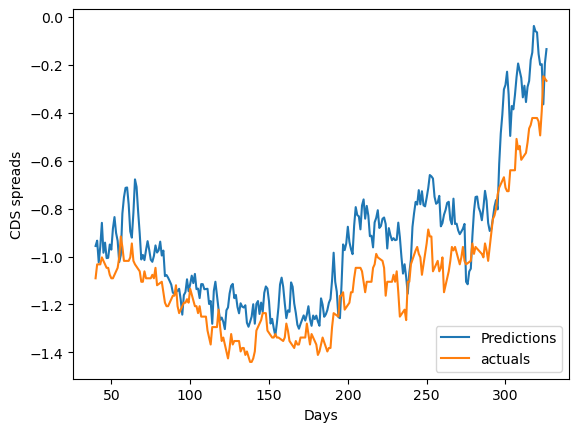

In [73]:
plt.plot(train_results['Train Predictions'][40:])
plt.plot(train_results['Actuals'][40:])
plt.legend(["Predictions", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('FNN results.png')

In [89]:
# for inverse transformation input
df_scaled_input_inversed = scaler_input.inverse_transform(df_scaled_input)


# for inverse transformation output
scaled_y_hat_lstm = scaler_output.inverse_transform(y_hat_lstm)

scaled_y_hat_gru = scaler_output.inverse_transform(y_hat_gru)

scaled_y_hat_con1d = scaler_output.inverse_transform(y_hat_conv1d)




In [90]:
scaled_y_hat_gru

array([[2.1182234],
       [2.1439705],
       [2.147853 ],
       [2.1768906],
       [2.1691508],
       [2.1574728],
       [2.1460688],
       [2.125123 ],
       [2.11923  ],
       [2.1350064],
       [2.1703053],
       [2.1635253],
       [2.1452434],
       [2.1380115],
       [2.129319 ],
       [2.1458225],
       [2.1280882],
       [2.110389 ],
       [2.1027517],
       [2.1020625],
       [2.1048908],
       [2.070995 ],
       [2.0760758],
       [2.0681958],
       [2.076167 ],
       [2.0741951],
       [2.074092 ],
       [2.0750937],
       [2.0496352],
       [2.042107 ],
       [2.02261  ],
       [2.0128453],
       [2.0199087],
       [2.0294943],
       [2.0398521],
       [2.0291865],
       [2.0419524],
       [2.0047522],
       [2.0398376],
       [2.0340881],
       [2.0219648],
       [2.0139675],
       [2.0374894],
       [2.0481222],
       [2.0697563],
       [2.0514467],
       [2.0620327],
       [2.0638425],
       [2.061069 ],
       [2.0584037],


In [91]:
scaled_y_val = scaler_output.inverse_transform([y_val])

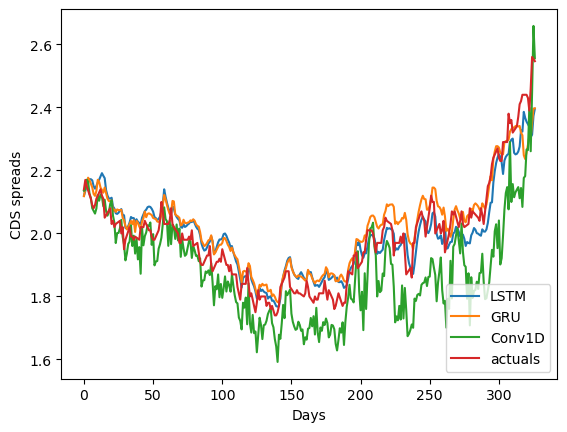

In [92]:
plt.plot(scaled_y_hat_lstm.flatten())
plt.plot(scaled_y_hat_gru.flatten())
plt.plot(scaled_y_hat_con1d.flatten())
plt.plot(scaled_y_val.flatten())

plt.legend(["LSTM","GRU","Conv1D", "actuals"], loc ="lower right")
plt.xlabel('Days')
plt.ylabel('CDS spreads')
plt.savefig('allmodels.png')